# 第〇章 安装Jupyter notebook for R

* 参见：https://zhuanlan.zhihu.com/p/25430471
* 命令：
```
conda install -c r r-essentials
```

# 第一章 R语言介绍

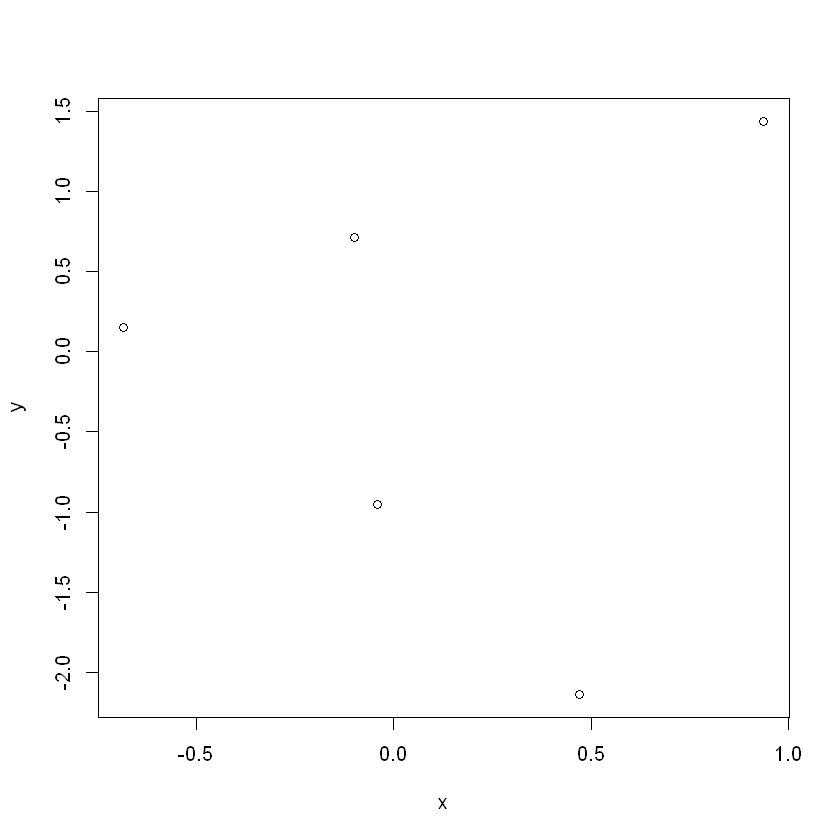

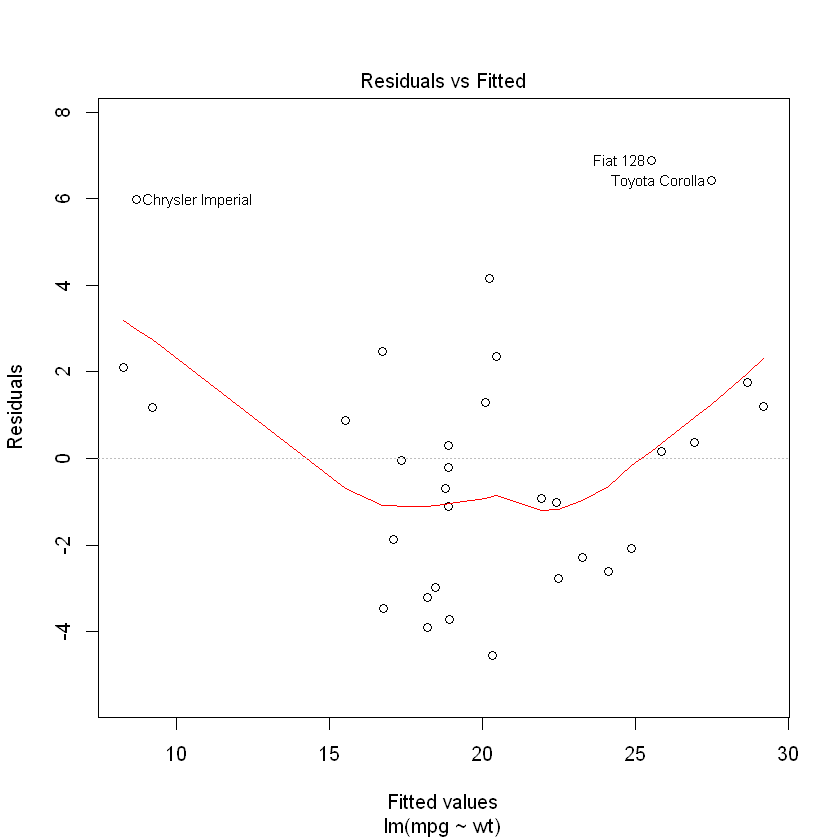

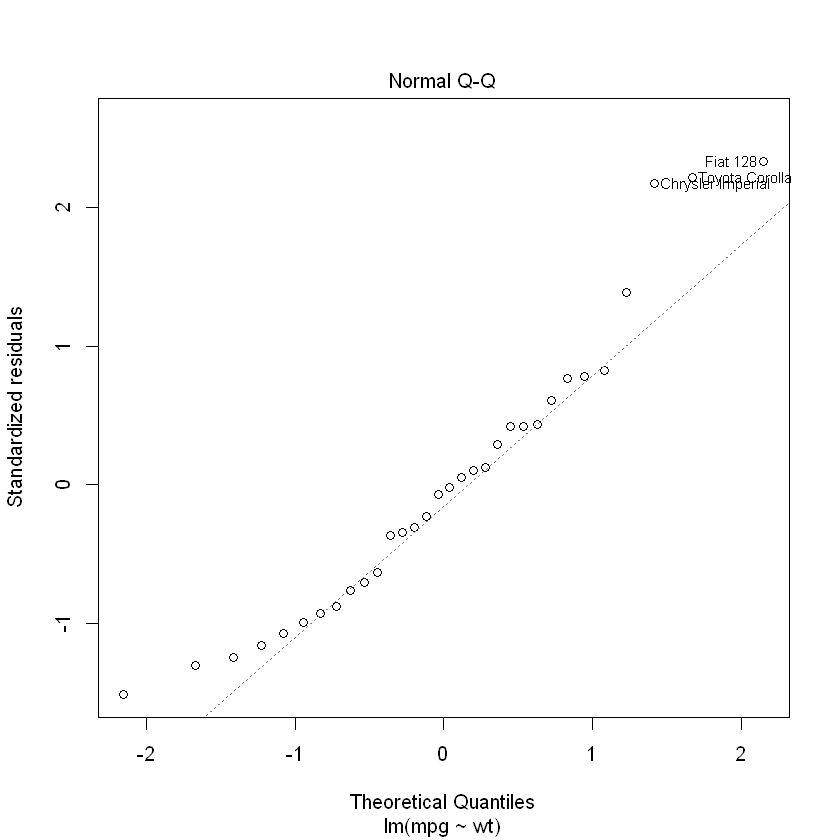

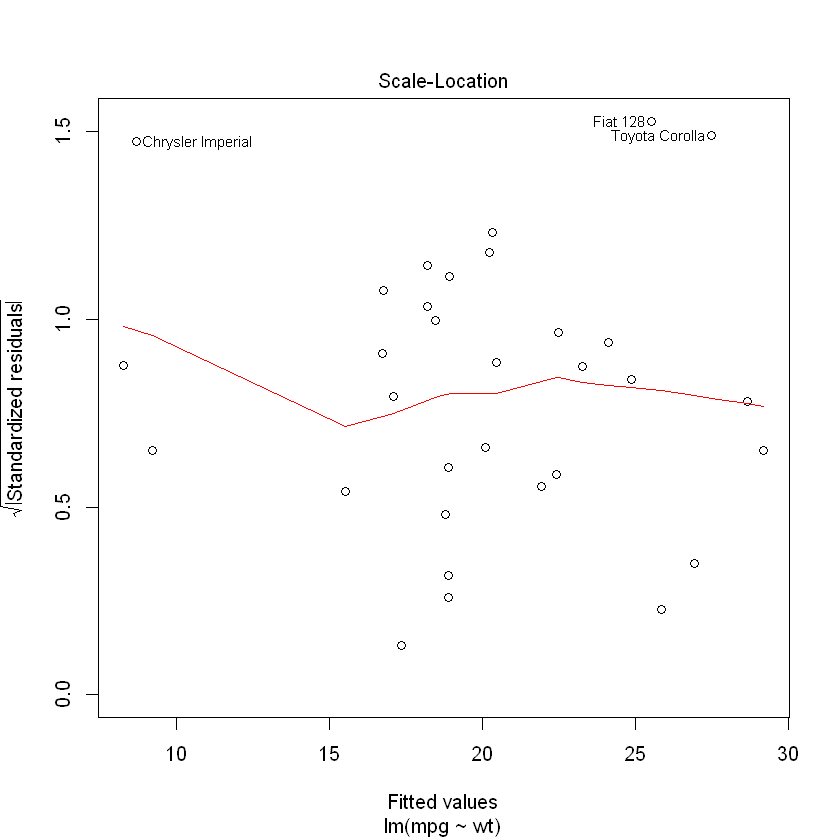

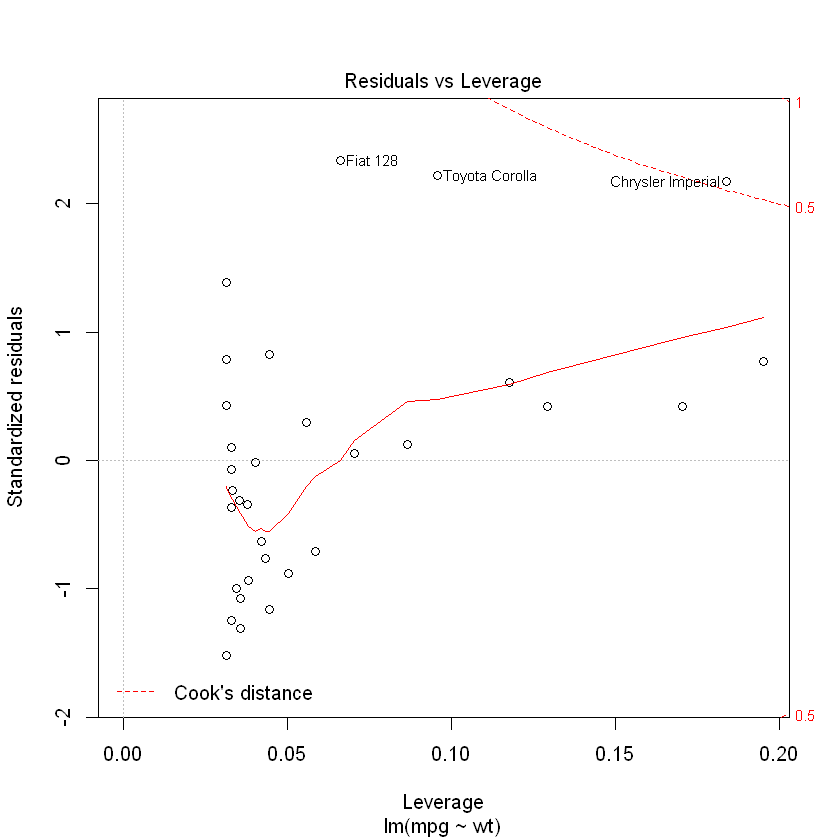

In [58]:
x<-rnorm(5)
y<-rnorm(5)
plot(x,y)
lmfit <- lm(mpg~wt, data=mtcars)
plot(lmfit)

In [38]:
getwd()
ls()

[1] "E:/code/R"

[1] "a" "b" "c" "d" "x" "y"

In [19]:
history(1)

ERROR: Error in .External2(C_savehistory, file): 'savehistory' can only be used in Rgui and Rterm


### 安装包

In [21]:
install.packages("vcd")

package 'vcd' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\lenovo\AppData\Local\Temp\Rtmpsn9aMi\downloaded_packages


# 第二章 创建数据集

### 向量

In [35]:
a<-c(1,2,3,4)
b<-c("two", 1, TRUE) # 所有的都变为string
c<-c(1, TRUE) # 所有的都变为bool
d<-c(TRUE, 'one', 1) # 所有的都变为string
a[1:3] # 不同于Python的左闭右开，这里是左闭右闭

[1] 1 2 3

### 矩阵

In [44]:
y <- matrix(1:20, nrow=5, ncol=4)
# y
# 根据向量创建矩阵
cells <- c(1,25,24,68)
rnames <-c('R1','R2')
cnames <-c('C1','C2')
# 按行填充的2*2矩阵
mymatrix <- matrix(cells, nrow = 2,ncol = 2,byrow=TRUE, dimnames = list(rnames, cnames))
# mymatrix

# 矩阵索引
y[1,2] # 注意不是从0开始的！

[1] 6

### 数组
* 与矩阵类似，维度可以大于2

### 数据框 data frame

jzm,age
1,1
3,9
4,2
5,6


[1] 1 9 2 6

The following objects are masked from mtcars (pos = 3):

    am, carb, cyl, disp, drat, gear, hp, mpg, qsec, vs, wt



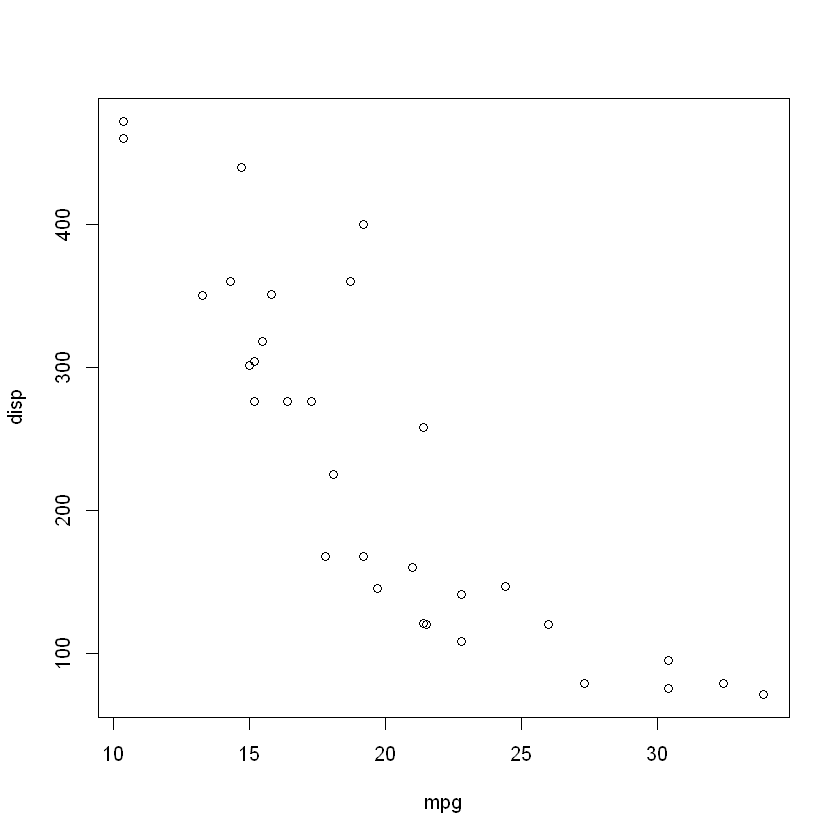

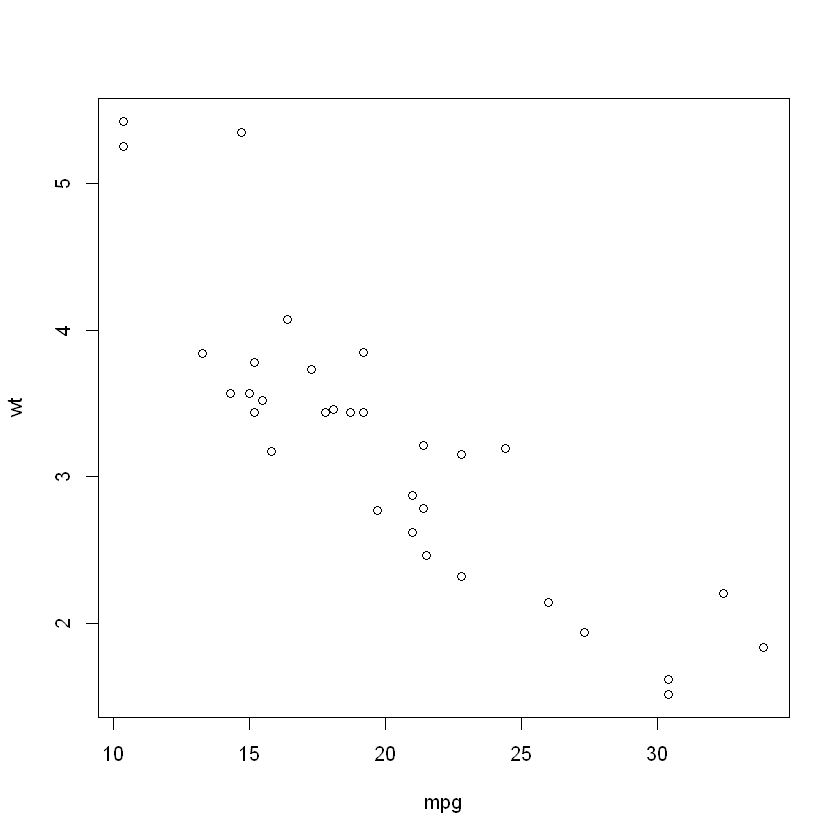

In [63]:
# 先输入几列数
jzm <- c(1,3,4,5)
age<-c(1,9,2,6)
moha <- data.frame(jzm, age)
# moha
# 访问data frame
# by index
moha[1:2] # 前两列
# mode[c('jzm', 'age')]
moha$age # 按列名索引

# attach功能，串列data frame或list或R data file
help(attach)
attach(mtcars)
plot(mpg, disp)
plot(mpg, wt)
detach(mtcars)

In [67]:
# 防止屏蔽用with
with(mtcars,{
#     summary(mpg, disp, wt)
#     plot(mpg, disp)
#     plot(mpg, wt)
    stats <<- summary(mpg) # 在with之外仍存活：用<<-赋值
}
    )
stats

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  10.40   15.43   19.20   20.09   22.80   33.90 

### 因子factor
* 名义型+有序型

In [84]:
# 类别变量
diabetes <- c('Type1','Type2','Type1', 'Type1')
diabetes <- factor(diabetes)
# diabetes
# 有序变量
status <- c('Poor', 'Improved', 'Excellet','Poor') 
status <- factor(status, ordered = TRUE)# 默认字符型按字母顺序排
status[1]<status[2]
# 自定义字符串排列顺序
status <- factor(status, ordered = TRUE, levels = c('Poor', 'Improved', 'Excellent'))
status[1]<status[2]

[1] FALSE

[1] TRUE

In [86]:
str(moha)
summary(moha)

'data.frame':	4 obs. of  2 variables:
 $ jzm: num  1 3 4 5
 $ age: num  1 9 2 6


      jzm            age      
 Min.   :1.00   Min.   :1.00  
 1st Qu.:2.50   1st Qu.:1.75  
 Median :3.50   Median :4.00  
 Mean   :3.25   Mean   :4.50  
 3rd Qu.:4.25   3rd Qu.:6.75  
 Max.   :5.00   Max.   :9.00  

### 列表list
* 对象的有序集合

In [99]:
mylist <- list(moha, jzm, mymatrix)
mylist[1:3]

[[1]]
  jzm age
1   1   1
2   3   9
3   4   2
4   5   6

[[2]]
[1] 1 3 4 5

[[3]]
   C1 C2
R1  1 25
R2 24 68

In [115]:
g <- 'title'
h <- c(1926, 817)
j <- matrix(1:10, nrow = 5)
mylist <- list(title=g, ages=h,j)
mylist[1] # 访问matrix会出现莫名其妙的问题

$title
[1] "title"

In [118]:
x <- c(1,2,3)
x[7]<-10
x

[1]  1  2  3 NA NA NA 10

### 导入数据

In [127]:
# 从csv中导入
grades <- read.table('jzm.csv', header = TRUE, sep='\t', row.names = 'name')
grades

,age
jiangzemin,91
songzuying,50
hujintao,75


In [144]:
# 从excel中导入

# install.packages('RODBC') #需要安装此包
# 下面代码出现错误Error in odbcConnectExcel("test.xlsx"): odbcConnectExcel is only usable with 32-bit Windows
    # library('RODBC')
    # channel <- odbcConnectExcel('test.xlsx')
    # mydf <- sqlFetch(channel, 'sheet1')
    # odbcClose(channel)

# 用readxl包
# install.packages("readxl")
library('readxl')
df <- read_excel("test.xlsx", sheet='Sheet1')
df
# 用xlsx包
# install.packages("xlsx")
# library("xlsx")
# df <- read.xlsx('test.xlsx')

X__1,STRALHERORDER,NUM,AVGA,AVGW,AVGSLOPEERO,AVGCHANNELERO,SSY_slope,SSY_channel
0,1,30741,5.875039e+04,5.099316e+03,7.722357e+05,0.000000e+00,13.14435,0.000000
1,2,6611,2.645760e+05,2.252420e+04,3.442017e+06,3.248399e+05,13.00956,1.227775
2,3,1399,1.272063e+06,1.091589e+05,1.679813e+07,3.456164e+06,13.20543,2.716977
3,4,302,5.929190e+06,5.162037e+05,7.978070e+07,5.521171e+07,13.45558,9.311847
4,5,50,3.434885e+07,3.007181e+06,4.426105e+08,6.773810e+08,12.88574,19.720630
5,6,13,1.489875e+08,1.391090e+07,1.989905e+09,4.954790e+09,13.35619,33.256405
6,7,4,4.603246e+08,4.101754e+07,5.752501e+09,1.670853e+10,12.49662,36.297281
7,8,1,3.087597e+09,2.624912e+08,3.809102e+10,1.382067e+11,12.33679,44.761900


In [149]:
# 从数据库中导入
library('RODBC')
myconn <- odbcConnect('orcl', uid='c##huangfuchuan', pwd='huangfuchuan')
rc <- sqlQuery(myconn, 'select * from riversegs')
str(rc)
close(myconn)

'data.frame':	61524 obs. of  44 variables:
 $ CHANNELINDEX : int  1153 1154 1156 1157 1158 1159 1155 1161 1880 1878 ...
 $ STRALHERORDER: int  2 2 2 2 1 1 1 1 1 1 ...
 $ UPSTREAMROW  : int  159 159 160 160 159 156 163 158 345 345 ...
 $ UPSTREAMCOL  : int  467 465 459 457 451 456 461 463 632 628 ...
 $ DOWNSTREAMPR : int  169 159 159 160 160 159 160 158 346 345 ...
 $ DOWNSTREAMPC : int  486 466 464 458 456 456 465 466 629 623 ...
 $ DOWNSTREAMLR : int  170 159 159 160 160 160 159 159 346 346 ...
 $ DOWNSTREAMLC : int  487 467 465 459 457 457 465 467 628 622 ...
 $ AREASOURCE   : num  -1 -1 -1 -1 17490 ...
 $ AREALEFT     : num  70660 700 4198 3498 31482 ...
 $ AREARIGHT    : num  86751 700 12593 25885 18190 ...
 $ SLOPESOURCE  : num  -1 -1 -1 -1 0.158 ...
 $ SLOPELEFT    : num  0.154 0 0.24 0.175 0.146 ...
 $ SLOPERIGHT   : num  0.119 0 0.156 0.146 0.169 ...
 $ ASPECTLEFT   : num  209 180 171 180 189 ...
 $ ASPECTRIGHT  : num  28.81 0 350.54 0 9.46 ...
 $ ASPECTSOURCE : num  -1 -1 -1 

## 标注数据集

In [156]:
# 变量标签
names(jzm)[1] <- 'gou li guo jia sheng si yi'
jzm
# 值标签


gou li guo jia sheng si yi                       <NA> 
                         1                          3 
                      <NA>                       <NA> 
                         4                          5

## 处理对象的函数

In [163]:
names(mtcars)

with(mtcars,{
    rbind(mpg,cyl)
})


[1] "mpg"  "cyl"  "disp" "hp"   "drat" "wt"   "qsec" "vs"   "am"   "gear"
[11] "carb"

mpg,21,21,22.8,21.4,18.7,18.1,14.3,24.4,22.8,19.2,...,15.2,13.3,19.2,27.3,26,30.4,15.8,19.7,15,21.4
cyl,6,6,4.0,6.0,8.0,6.0,8.0,4.0,4.0,6.0,...,8.0,8.0,8.0,4.0,4,4.0,8.0,6.0,8,4.0


# 第三章 图形初阶

In [1]:
with(mtcars,
     {
         pdf('mygraph.pdf')
         plot(wt, mpg)
         abline(lm(mpg~wt))
         title('MPG2Wt') # 如果要用pdf绝对不能有中文...还是Python好点
         dev.off()
     })

png 
  2

In [ ]:
with(mtcars,
     {
         plot(wt, mpg)
         abline(lm(mpg~wt))
         title('MPG2Wt') # 如果要用pdf绝对不能有中文...还是Python好点
     })


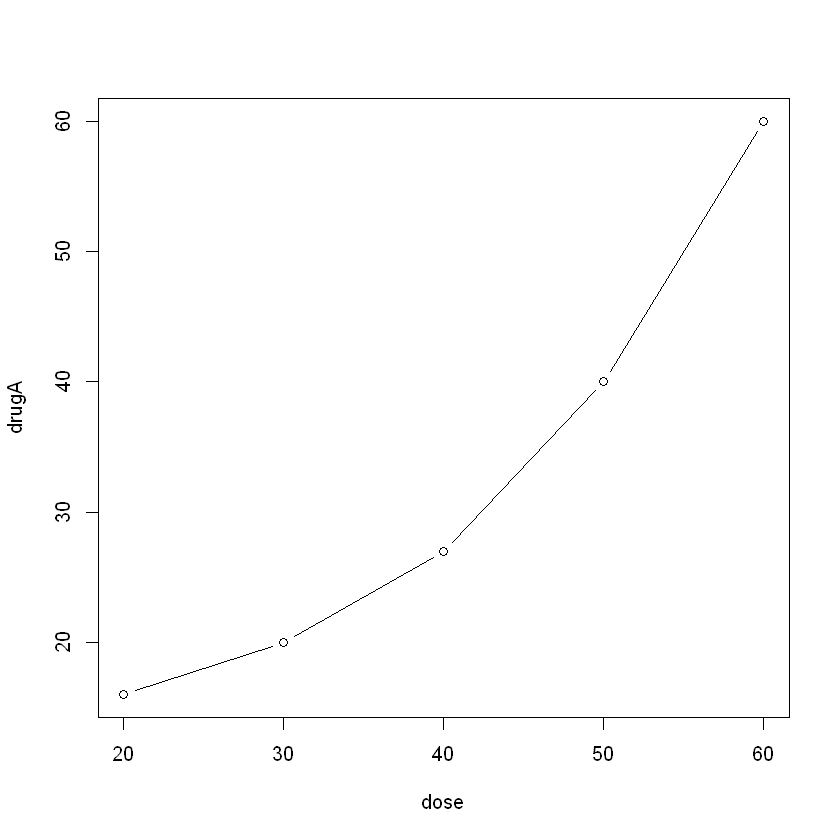

In [3]:
# 药物剂量和相应关系
dose <- c(20, 30, 40, 50, 60)
drugA <- c(16, 20, 27, 40, 60)
drugB <- c(15, 18,125, 31, 40)
plot(dose, drugA, type='b') # type='b'表示同时绘制点和线


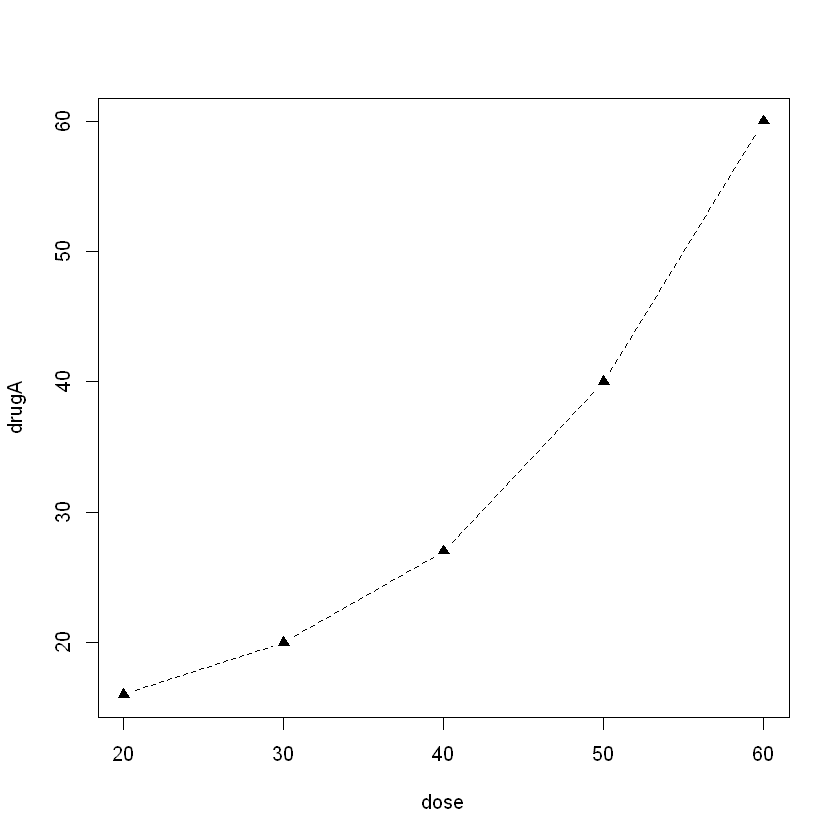

In [5]:
opar <- par(no.readonly=TRUE)
par(lty=2, pch=17) # 修改为虚线及实心三角
plot(dose, drugA, type='b')
par(opar)

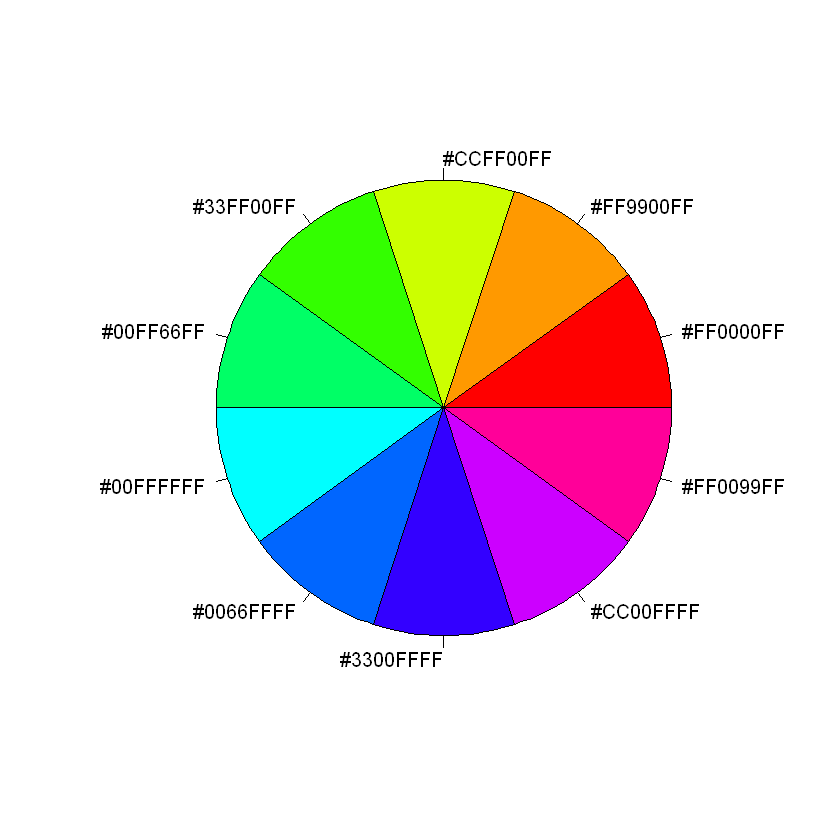

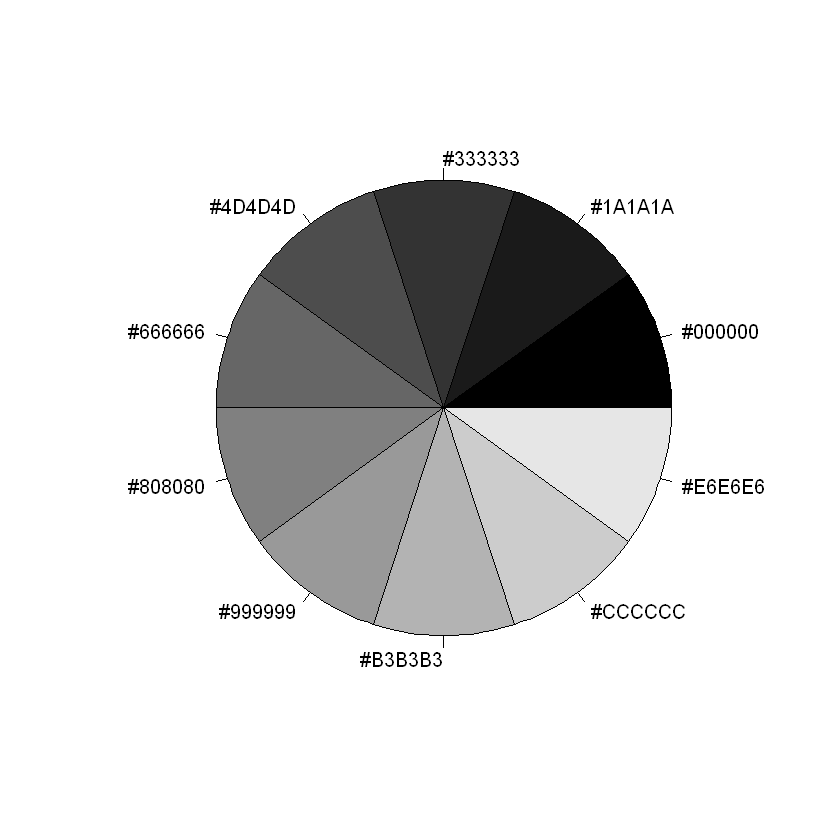

In [6]:
n <- 10
mycolors <- rainbow(n)
pie(rep(1, n), labels=mycolors, col=mycolors)
mygrays <- gray(0:n/n)
pie(rep(1, n), labels=mygrays, col=mygrays)

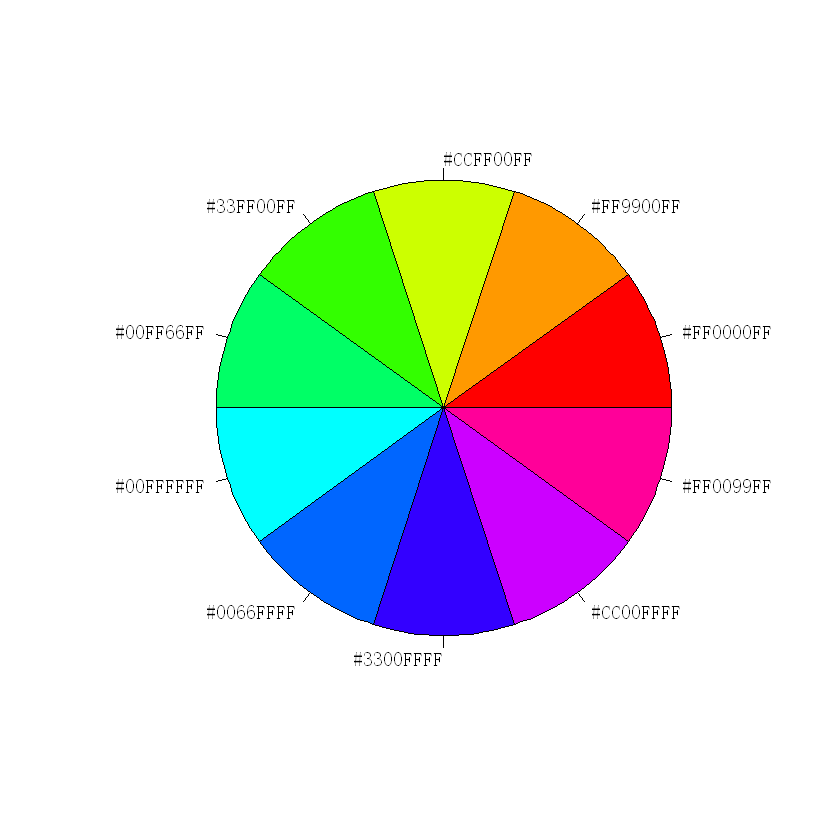

In [26]:
windowsFonts(
A=windowsFont("Songti"),
    B = windowsFont('Kaiti')
)
par(family = "A")
pie(rep(1, n), labels=mycolors, col=mycolors)

In [13]:
names(pdfFonts())

[1] "serif"                "sans"                 "mono"                
 [4] "AvantGarde"           "Bookman"              "Courier"             
 [7] "Helvetica"            "Helvetica-Narrow"     "NewCenturySchoolbook"
[10] "Palatino"             "Times"                "URWGothic"           
[13] "URWBookman"           "NimbusMon"            "NimbusSan"           
[16] "URWHelvetica"         "NimbusSanCond"        "CenturySch"          
[19] "URWPalladio"          "NimbusRom"            "URWTimes"            
[22] "ArialMT"              "Japan1"               "Japan1HeiMin"        
[25] "Japan1GothicBBB"      "Japan1Ryumin"         "Korea1"              
[28] "Korea1deb"            "CNS1"                 "GB1"

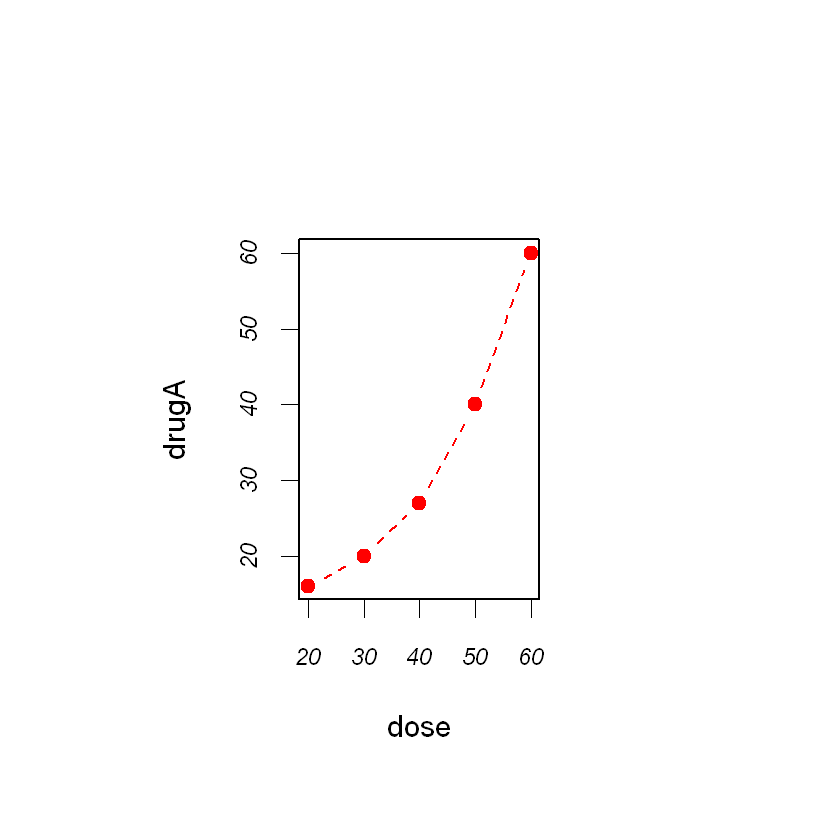

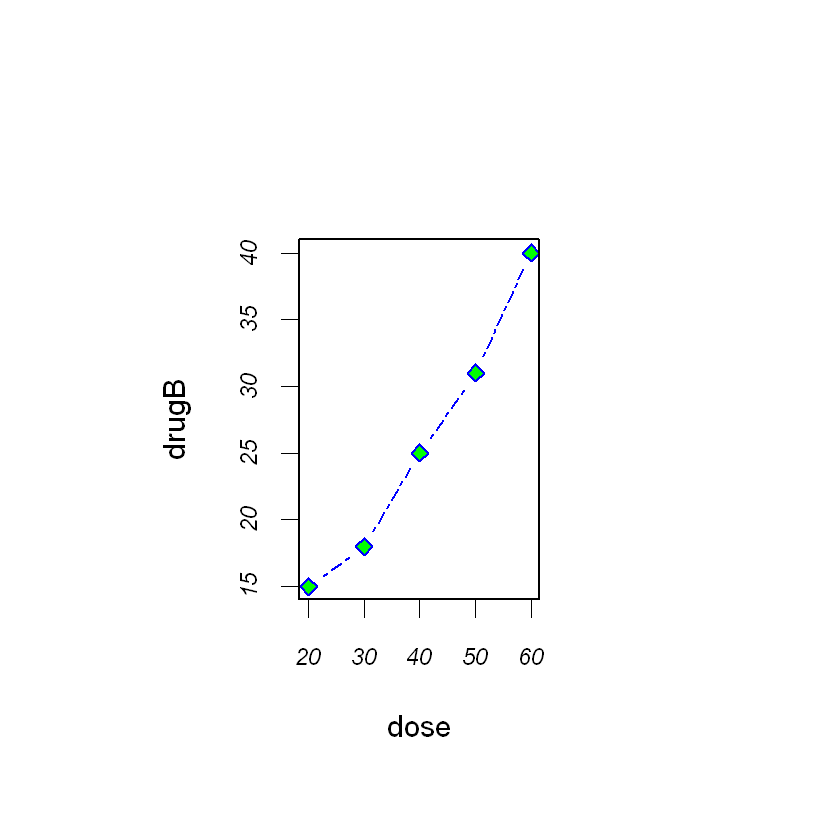

In [29]:
dose <- c(20, 30, 40, 50, 60)
drugA <- c(16, 20, 27, 40, 60)
drugB <- c(15, 18, 25, 31, 40)
opar <- par(no.readonly=TRUE)
par(pin=c(2,3))
par(lwd=2, cex=1.5)
par(cex.axis = .75, font.axis = 3)
plot(dose, drugA, type = "b", pch=19, lty=2, col="red")
plot(dose, drugB, type = "b", pch=23, lty=6, col="blue", bg="green")
# plot(dose, drugA, type='b')
par(opar)

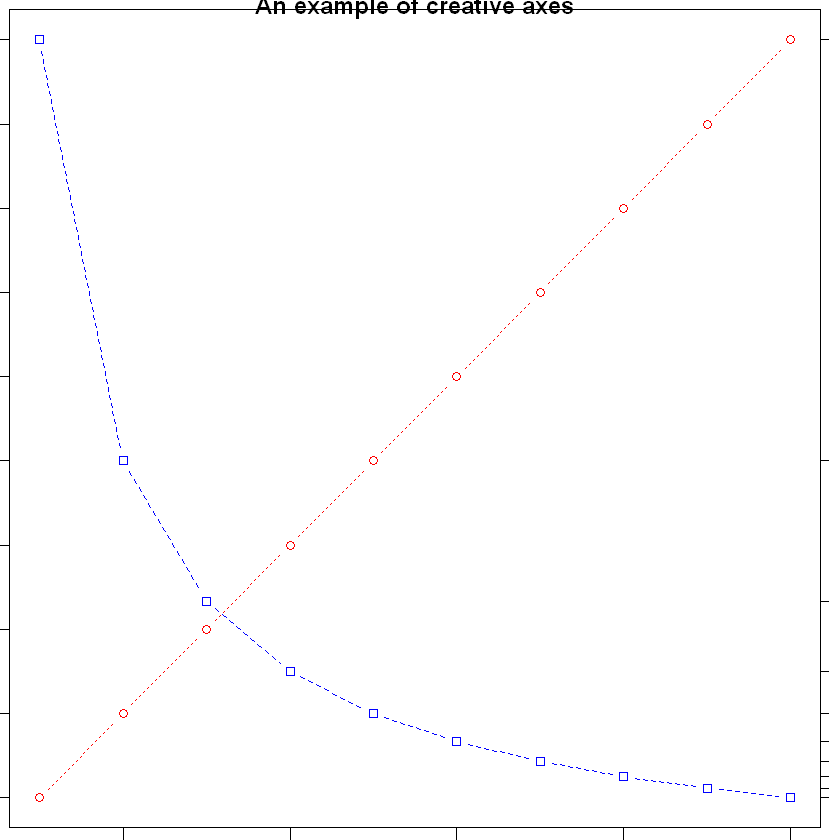

In [50]:
# 自定义坐标轴
x <- c(1:10)
y <- x
z <- 10/x

opar <- par(no.readonly=TRUE)
par(mar=c(5,4,4,8)*0.1)
plot(x,y,type = 'b',
    pch=21, col='red',
    yaxt='n', lty=3, ann=FALSE)
lines(x, z, type = 'b', pch=22, col='blue', lty=2) # 添加x对1/x的直线
axis(2, at=x, labels=x, col.axis='red', las=2)
axis(4, at=z, labels = round(z, digits = 2), 
     col.axis='blue', las=2, cex.axis=0.7, tck=-0.01)
mtext('y=1/x', side=4, line=3, cex.lab=1, las=2, col='blue')
title('An example of creative axes', xlab='X values', ylab="Y=X")
par(opar)

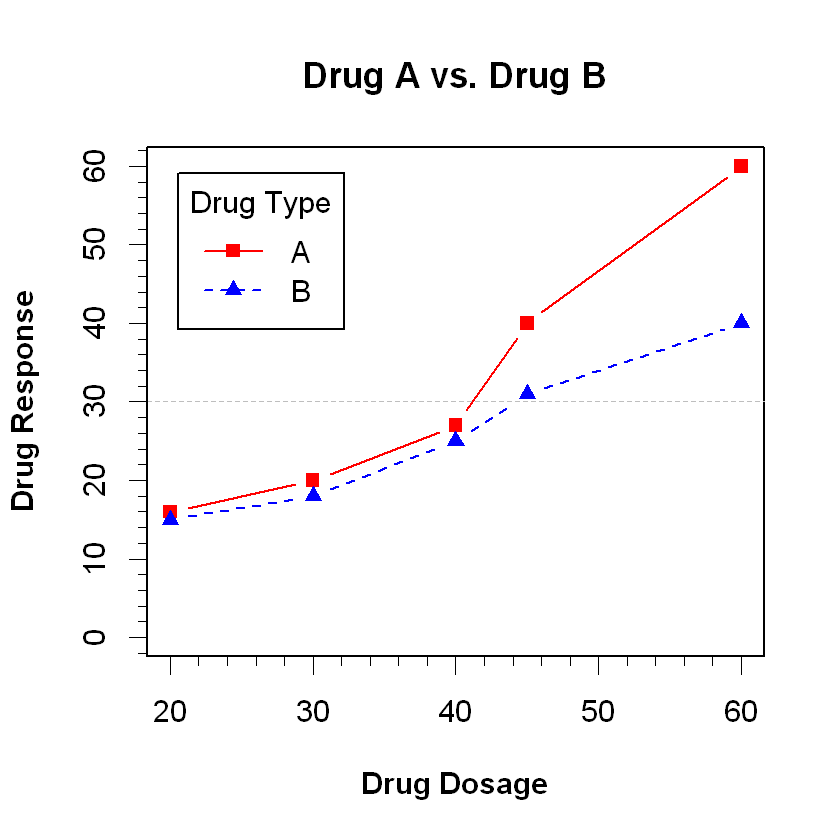

In [55]:
# Listing 3.3 - Comparing Drug A and Drug B response by dose
dose <- c(20, 30, 40, 45, 60)
drugA <- c(16, 20, 27, 40, 60)
drugB <- c(15, 18, 25, 31, 40)
opar <- par(no.readonly=TRUE)
par(lwd=2, cex=1.5, font.lab=2)
plot(dose, drugA, type="b",
     pch=15, lty=1, col="red", ylim=c(0, 60),
     main="Drug A vs. Drug B",
     xlab="Drug Dosage", ylab="Drug Response")
lines(dose, drugB, type="b",
      pch=17, lty=2, col="blue")
abline(h=c(30), lwd=1.5, lty=2, col="gray")
library(Hmisc)
minor.tick(nx=5, ny=5, tick.ratio=0.5) # nx, ny表示大刻度中间多少空
legend("topleft", inset=.05, title="Drug Type", c("A","B"),
       lty=c(1, 2), pch=c(15, 17), col=c("red", "blue"))
par(opar)

The following object is masked from package:ggplot2:

    mpg



[1] "Mazda RX4"           "Mazda RX4 Wag"       "Datsun 710"         
 [4] "Hornet 4 Drive"      "Hornet Sportabout"   "Valiant"            
 [7] "Duster 360"          "Merc 240D"           "Merc 230"           
[10] "Merc 280"            "Merc 280C"           "Merc 450SE"         
[13] "Merc 450SL"          "Merc 450SLC"         "Cadillac Fleetwood" 
[16] "Lincoln Continental" "Chrysler Imperial"   "Fiat 128"           
[19] "Honda Civic"         "Toyota Corolla"      "Toyota Corona"      
[22] "Dodge Challenger"    "AMC Javelin"         "Camaro Z28"         
[25] "Pontiac Firebird"    "Fiat X1-9"           "Porsche 914-2"      
[28] "Lotus Europa"        "Ford Pantera L"      "Ferrari Dino"       
[31] "Maserati Bora"       "Volvo 142E"

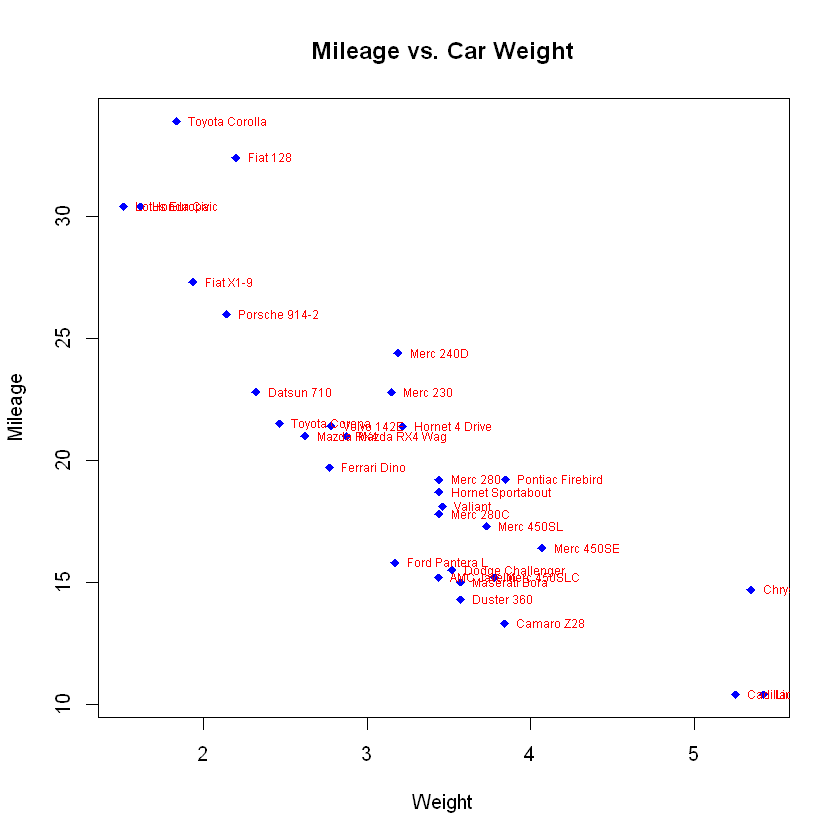

In [59]:
# Example of labeling points
attach(mtcars)
plot(wt, mpg,
     main="Mileage vs. Car Weight",
     xlab="Weight", ylab="Mileage",
     pch=18, col="blue")
text(wt, mpg,
     row.names(mtcars),
     cex=0.6, pos=4, col="red")
detach(mtcars)
row.names(mtcars)

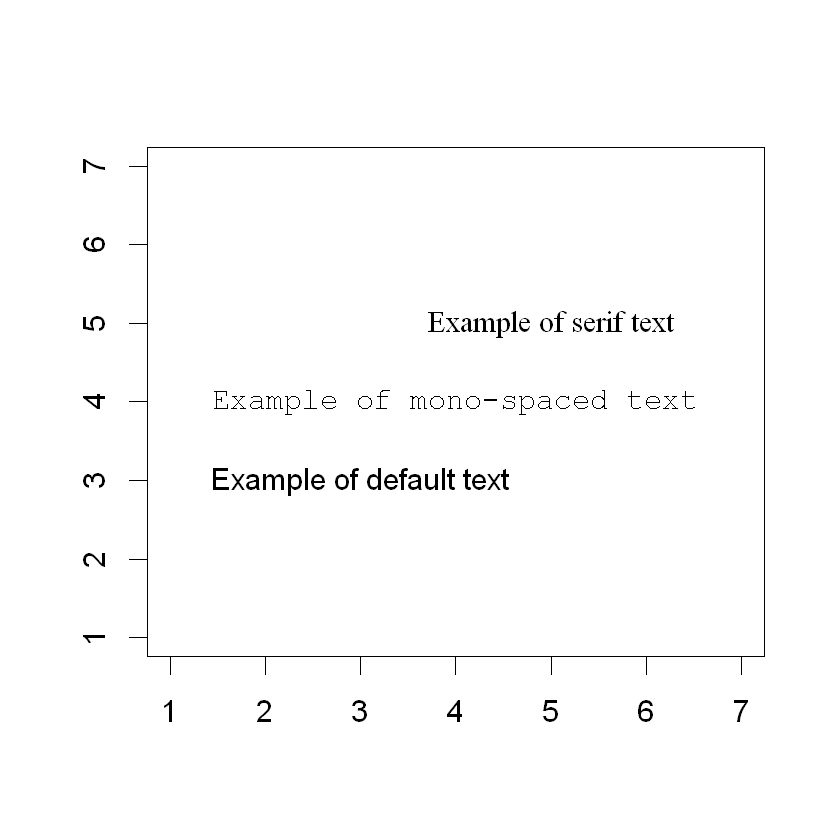

In [65]:
opar <- par(no.readonly=TRUE)
par(cex=1.5)
plot(1:7,1:7,type="n", xlab='', ylab='')
text(3,3,"Example of default text")
text(4,4,family="mono","Example of mono-spaced text")
text(5,5,family="serif","Example of serif text")
par(opar)

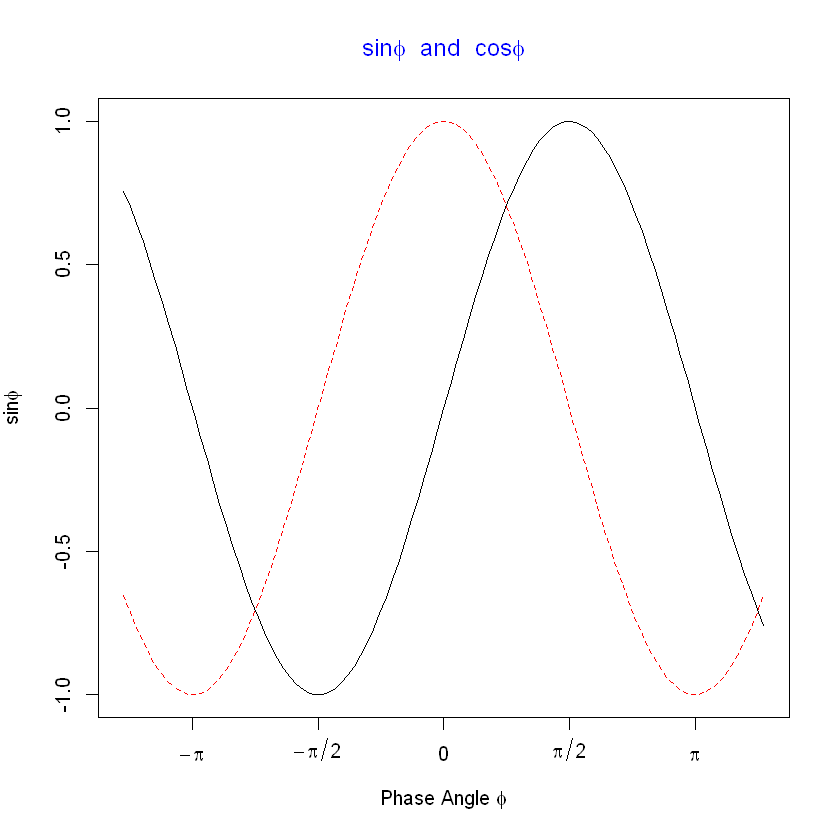

In [67]:
x <- seq(-4, 4, len = 101)
y <- cbind(sin(x), cos(x))
matplot(x, y, type = "l", xaxt = "n",
        main = expression(paste(plain(sin) * phi, "  and  ",
                                plain(cos) * phi)),
        ylab = expression("sin" * phi, "cos" * phi), # only 1st is taken
        xlab = expression(paste("Phase Angle ", phi)),
        col.main = "blue")
axis(1, at = c(-pi, -pi/2, 0, pi/2, pi),
     labels = expression(-pi, -pi/2, 0, pi/2, pi))


## 图形的组合

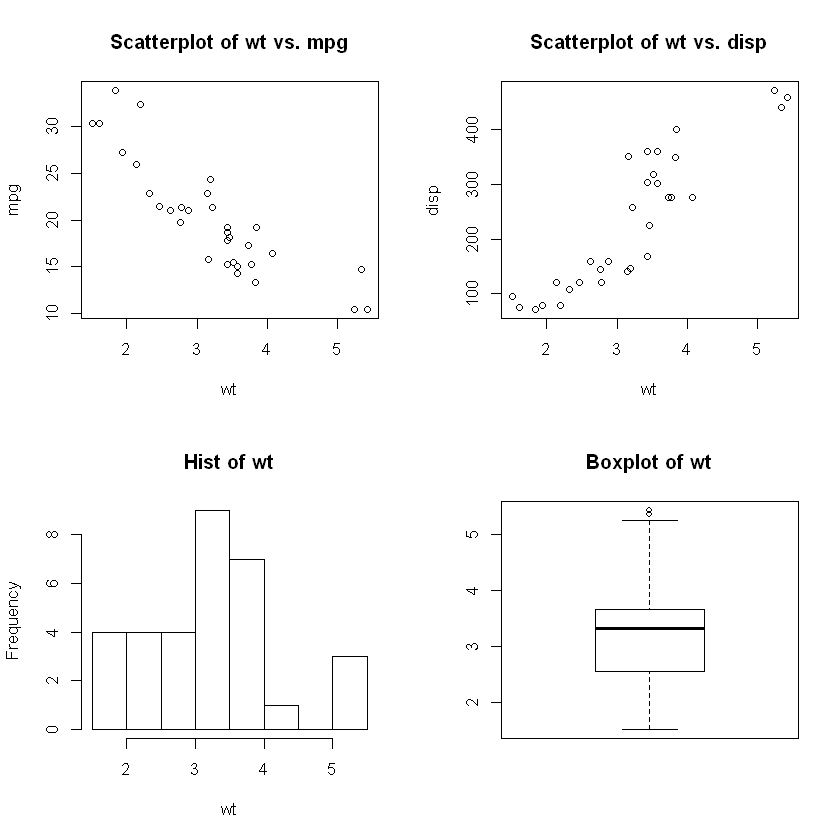

In [1]:
# 四副图形两行两列
attach(mtcars)
opar <- par(no.readonly=TRUE)
par(mfrow=c(2,2))
plot(wt, mpg, main='Scatterplot of wt vs. mpg')
plot(wt, disp, main='Scatterplot of wt vs. disp')
hist(wt, main='Hist of wt') # 频数统计图
boxplot(wt, main='Boxplot of wt') # 箱型图
par(opar)
detach(mtcars)

# R画各种统计的图是真方便

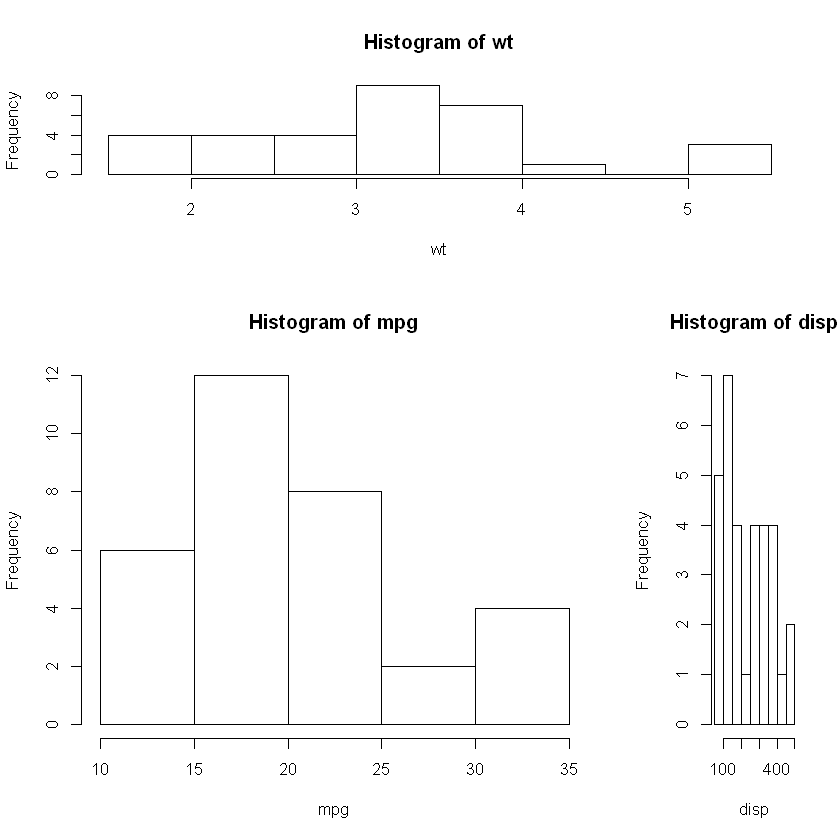

In [10]:
# 使用layout函数，参数为矩阵
attach(mtcars)
layout(matrix(c(1,1,2,3),2,2,byrow = TRUE), widths = c(3,1), heights = c(1,2))
# 第一行图形高度是第二行的1/3，右下角宽度是左下角1/4（可以理解为把矩形分块）
hist(wt)
hist(mpg)
hist(disp)
detach(mtcars)

In [8]:
matrix(c(1,1,2,3),2,2,byrow = TRUE) #这个矩阵表示1,1,2,3按横排2行2列，两个1表示第一行为同一个图

1,1
2,3


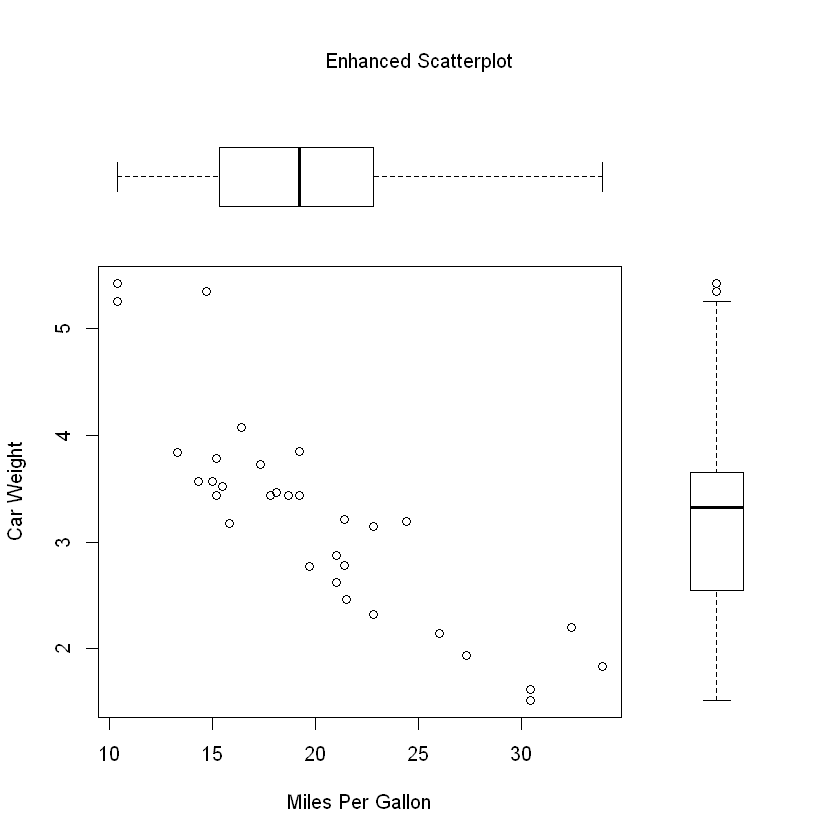

In [12]:
# 多幅图形布局的精细控制
# 这种图用Python的确比较难画
opar<-par(no.readonly=TRUE)
par(fig=c(0, 0.8, 0, 0.8)) # 设置散点图，fig为(x1,x2,y1,y2)，代表绘图区域
plot(mtcars$mpg, mtcars$wt,
     xlab="Miles Per Gallon",
     ylab="Car Weight")
par(fig=c(0, 0.8, 0.55, 1), new=TRUE) # 上方添加箱型图
boxplot(mtcars$mpg, horizontal=TRUE, axes=FALSE)
par(fig=c(0.65, 1, 0, 0.8), new=TRUE) #右侧添加箱型图
boxplot(mtcars$wt, axes=FALSE)
mtext("Enhanced Scatterplot", side=3, outer=TRUE, line=-3)
par(opar)

# 第4章 基本数据管理

## 4.1 Demo

In [39]:
# 创建leadership数据框
manager <- c(1,2,3,4,5)
date <- c("10/24/08","10/28/08","10/1/08","10/12/08","5/1/09")
gender <- c("M","F","F","M","F")
age <- c(32,45,25,39,99)
q1 <- c(5,3,3,3,2)
q2 <- c(4,5,5,3,2)
q3 <- c(5,2,5,4,1)
q4 <- c(5,5,5,NA,2)
q5 <- c(5,5,2,NA,1)
leadership <- data.frame(manager,date,gender,age,q1,q2,q3,q4,q5, 
                         stringsAsFactors=FALSE) # 创建dataframe，由于有字符串，需要不认成factors

In [7]:
leadership

manager,date,gender,age,q1,q2,q3,q4,q5
1,10/24/08,M,32,5,4,5,5,5
2,10/28/08,F,45,3,5,2,5,5
3,10/1/08,F,25,3,5,5,5,2
4,10/12/08,M,39,3,3,4,NA,NA
5,5/1/09,F,99,2,2,1,2,1


## 创建新变量

In [11]:
mydata <- data.frame(x1=c(2,2,6,4),
                    x2=c(3,4,2,8))
mydata <- transform(mydata, sumx= x1+x2, meanx = (x1+x2)/2)
mydata

x1,x2,sumx,meanx
2,3,5,2.5
2,4,6,3.0
6,2,8,4.0
4,8,12,6.0


## 变量的重编码

In [16]:
leadership <- within(leadership, { # within类似with，在leadership空间下。但是可以修改修改数据库
    agecat[age == 99] <- NA # 书上代码有问题
    agecat[age > 75 & age<99] <- 'Elder' # 长者
    agecat[age >= 55 & age <= 75] <- 'Middle Aged'
    agecat[age < 55] <- 'Too young'
})
leadership

manager,date,gender,age,q1,q2,q3,q4,q5,agecat
1,10/24/08,M,32,5,4,5,5,5,Too young
2,10/28/08,F,45,3,5,2,5,5,Too young
3,10/1/08,F,25,3,5,5,5,2,Too young
4,10/12/08,M,39,3,3,4,NA,NA,Too young
5,5/1/09,F,99,2,2,1,2,1,NA


## 变量的重命名

In [20]:
# fix(leadership) # 调出框来调，交互性不错！

#下面使用reshape
# install.packages('reshape') # 首先要安装
library(reshape) # 加载
leadership <- rename(leadership, c(manager='managerID', date='testdate'))
# leadership

In [24]:
# 下面使用 names
names(leadership)[5:9] <- c('item1', 'item2', 'item3', 'item4', 'item5')
leadership

manager,date,gender,age,item1,item2,item3,item4,item5
1,10/24/08,M,32,5,4,5,5,5
2,10/28/08,F,45,3,5,2,5,5
3,10/1/08,F,25,3,5,5,5,2
4,10/12/08,M,39,3,3,4,NA,NA
5,5/1/09,F,99,2,2,1,2,1


## 缺失值

In [30]:
y <- c(1,2,3,NA)
is.na(y)

[1] FALSE FALSE FALSE  TRUE

In [32]:
is.na(leadership[,5:9])

item1,item2,item3,item4,item5
FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,TRUE,TRUE
FALSE,FALSE,FALSE,FALSE,FALSE


In [34]:
# 计算时移出缺失值
x <- c(1,2,NA,3)
y <- sum(x, na.rm=TRUE)
y

[1] 6

In [4]:
leadership
newdata <- na.omit(leadership)
newdata

manager,date,gender,age,q1,q2,q3,q4,q5
1,10/24/08,M,32,5,4,5,5,5
2,10/28/08,F,45,3,5,2,5,5
3,10/1/08,F,25,3,5,5,5,2
4,10/12/08,M,39,3,3,4,NA,NA
5,5/1/09,F,99,2,2,1,2,1


,manager,date,gender,age,q1,q2,q3,q4,q5
1,1,10/24/08,M,32,5,4,5,5,5
2,2,10/28/08,F,45,3,5,2,5,5
3,3,10/1/08,F,25,3,5,5,5,2
5,5,5/1/09,F,99,2,2,1,2,1


## 日期值

In [20]:
mydates <- as.Date(c('2018-09-05', '1926-08-17')) # 默认为yyyy-mm-dd
mydates
dates <- as.Date(c('01/05/1965', '08/17/1926'), '%m/%d/%Y')
dates

[1] "2018-09-05" "1926-08-17"

[1] "1965-01-05" "1926-08-17"

In [17]:
# 时间戳
Sys.Date()
date()

# 格式化时间
format(Sys.Date(), format='%Y %B %d %A')  # 这特么居然是中文...
format(date(), format='%Y %B %d %A') 

[1] "2018-09-05"

[1] "Wed Sep 05 10:02:44 2018"

[1] "2018 九月 05 星期三"

[1] "Wed Sep 05 10:02:44 2018"

In [24]:
# 时间间隔
days <- mydates[1] - mydates[2]
days # 长者活的天数

# 日期转字符型
strDates <- as.character(date())
strDates

Time difference of 33622 days

[1] "Wed Sep 05 10:14:03 2018"

## 类型转换

In [36]:
# 判断用is.，转换用as.
is.vector(seq(10))

[1] TRUE

## 数据排序

In [47]:
# leadership
# newdata <- leadership[order(leadership$age)]
# newdata

attach(leadership)
newdata <- leadership[order(gender, -age)]
newdata
detach(leadership)


The following objects are masked _by_ .GlobalEnv:

    age, date, gender, manager, q1, q2, q3, q4, q5



q1,date,gender,age,manager
5,10/24/08,M,32,1
3,10/28/08,F,45,2
3,10/1/08,F,25,3
3,10/12/08,M,39,4
2,5/1/09,F,99,5


## 数据集的合并

In [ ]:
# 添加列
total <- merge(dataframeA, dataframeB, by='ID') # inner join
# 添加行
total <- rbind(dataframeA, dataframeB) # 必须有相同的变量

## 数据集取子集

In [55]:
newdata <- leadership[, c(5:9)] # 按列序号选取所有行
newdata
newdata <- leadership[, c('q1', 'q2')] # 按列名选取
newdata

# 更方便地创建字符型变量
myvars <- paste('q', 1:5, sep='')
myvars

q1,q2,q3,q4,q5
5,4,5,5,5
3,5,2,5,5
3,5,5,5,2
3,3,4,NA,NA
2,2,1,2,1


q1,q2
5,4
3,5
3,5
3,3
2,2


[1] "q1" "q2" "q3" "q4" "q5"

In [59]:
# 剔除变量
myvars <- names(leadership) %in% c('q3', 'q4') # 通过names选取所有变量，然后用%in%判断是否匹配
myvars
newdata <- leadership[!myvars]# 删除变量q3 q4
newdata

# 已知序号时可以用减号来剔除
newdata <- leadership[c(-8, -9)]
newdata

# 或者也可以置空
newdata <- leadership
newdata$q3 <- newdata$q4 <- NULL
newdata

[1] FALSE FALSE FALSE FALSE FALSE FALSE  TRUE  TRUE FALSE

manager,date,gender,age,q1,q2,q5
1,10/24/08,M,32,5,4,5
2,10/28/08,F,45,3,5,5
3,10/1/08,F,25,3,5,2
4,10/12/08,M,39,3,3,NA
5,5/1/09,F,99,2,2,1


manager,date,gender,age,q1,q2,q3
1,10/24/08,M,32,5,4,5
2,10/28/08,F,45,3,5,2
3,10/1/08,F,25,3,5,5
4,10/12/08,M,39,3,3,4
5,5/1/09,F,99,2,2,1


manager,date,gender,age,q1,q2,q5
1,10/24/08,M,32,5,4,5
2,10/28/08,F,45,3,5,5
3,10/1/08,F,25,3,5,2
4,10/12/08,M,39,3,3,NA
5,5/1/09,F,99,2,2,1


In [72]:
# 选入观测
newdata <- leadership[1:3,] # 选择1-3行
newdata <- leadership[which(leadership$gender=='M' &
                           leadership$age > 30),] # 年纪大于30的男性
newdata

# 使用subset函数
newdata <- subset(leadership, age>=35 | age < 24, select=c(q1, q2, q3, q4))
newdata

,manager,date,gender,age,q1,q2,q3,q4,q5
1,1,10/24/08,M,32,5,4,5,5,5
4,4,10/12/08,M,39,3,3,4,NA,NA


,q1,q2,q3,q4
2,3,5,2,5
4,3,3,4,NA
5,2,2,1,2


In [75]:
# 随机抽样
mysample <- leadership[sample(1:nrow(leadership), 3, replace=FALSE)] # 随机抽取不重复地三列
mysample

age,manager,gender
32,1,M
45,2,F
25,3,F
39,4,M
99,5,F


In [76]:
# 使用sql操作数据框
install.packages('sqldf')

also installing the dependencies 'bit', 'bit64', 'blob', 'memoise', 'gsubfn', 'proto', 'RSQLite', 'chron'



package 'bit' successfully unpacked and MD5 sums checked
package 'bit64' successfully unpacked and MD5 sums checked
package 'blob' successfully unpacked and MD5 sums checked
package 'memoise' successfully unpacked and MD5 sums checked
package 'gsubfn' successfully unpacked and MD5 sums checked
package 'proto' successfully unpacked and MD5 sums checked
package 'RSQLite' successfully unpacked and MD5 sums checked
package 'chron' successfully unpacked and MD5 sums checked
package 'sqldf' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\lenovo\AppData\Local\Temp\RtmpIbMEQO\downloaded_packages


In [79]:
library(sqldf)
# python也能做到，pandas.read_sql
newdf <- sqldf('select * from mtcars where carb=1 order by mpg', row.names=TRUE)
newdf

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Toyota Corona,21.5,4,120.1,97,3.70,2.465,20.01,1,0,3,1
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Fiat X1-9,27.3,4,79.0,66,4.08,1.935,18.90,1,1,4,1
Fiat 128,32.4,4,78.7,66,4.08,2.200,19.47,1,1,4,1
Toyota Corolla,33.9,4,71.1,65,4.22,1.835,19.90,1,1,4,1


# 第5章 高级数据处理

## 数值和字符处理函数

In [2]:
ceiling(3.14) # 不小于x的最小整数，天花板
floor(3.14) # 不大于x的最大整数，地板
trunc(-3.15) # 向0的整数部分

[1] 4

[1] 3

[1] -3

In [3]:
# 统计函数
mean(seq(100), trim=0.05) # 截尾平均数

[1] 50.5

In [4]:
diff(seq(100), lag=10) #滞后差分

[1] 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
[26] 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
[51] 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
[76] 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10

In [6]:
sd(seq(8))

[1] 2.44949

注意求$sd$的公式是：
$$
\frac{\sum_{i=1}^n(x_i-\bar{x})^2}{n-1}
$$

In [7]:
# 数据的标准化
newdata <- scale(seq(10)) # 默认变成均值为0，标准差为1
newdata

-1.4863011
-1.1560120
-0.8257228
-0.4954337
-0.1651446
0.1651446
0.4954337
0.8257228
1.1560120
1.4863011


### 概率函数
各种分布都有：注意
* d: desity
* p: distribution function
* q: qunatile function
* r: random

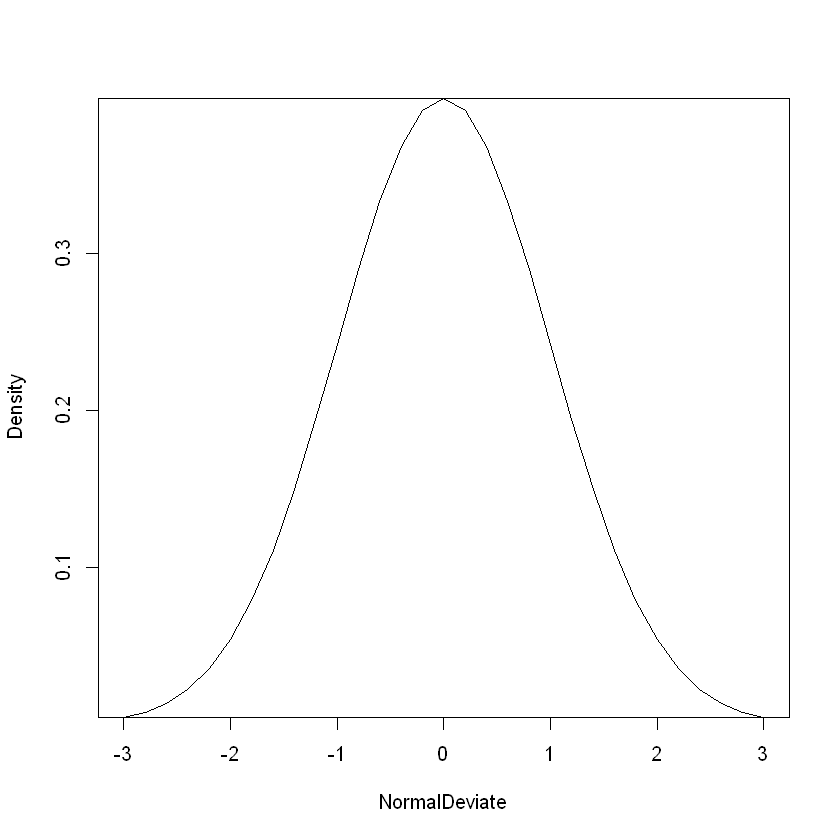

In [11]:
x <- pretty(c(-3,3), 30)
y <- dnorm(x)
plot(x, y,
    type="l",
    xlab="NormalDeviate",
    ylab="Density",
    yaxs="i")

In [16]:
pnorm(1.96)
qnorm(.9544, mean=500, sd=100)
rnorm(50, mean=50, sd=10)

[1] 0.9750021

[1] 668.9101

[1] 50.65621 57.77738 59.99228 66.06129 42.97818 38.77854 62.67254 46.78531
 [9] 41.44379 52.54212 57.80774 46.98398 58.36755 51.32668 40.87377 53.64404
[17] 47.01426 50.67287 59.65357 68.10742 56.61496 34.13718 43.02184 46.61324
[25] 51.55071 60.70462 40.91927 61.22065 47.81110 61.03796 51.27855 43.59028
[33] 55.29638 47.72748 53.98430 60.39372 65.33973 49.58690 52.86564 63.35236
[41] 66.11828 55.70940 51.26027 41.69201 43.10324 65.90534 50.88416 44.09310
[49] 57.29175 58.27580

In [18]:
# 设定随机数种子
runif(5) #生成0-1均匀分布的伪随机数
set.seed(1234)
runif(5)
set.seed(1234)
runif(5)

[1] 0.4482378 0.6303407 0.9061279 0.3324448 0.4003289

[1] 0.1137034 0.6222994 0.6092747 0.6233794 0.8609154

[1] 0.1137034 0.6222994 0.6092747 0.6233794 0.8609154

In [29]:
# 生成服从多元正态分布的数据
library(MASS)
options(digits = 3)
set.seed(1234)
mean <- c(230.7, 146.7, 3.6)
sigma <- matrix(c(15360.8, 6721.2, -47.1,
                 6721.2, 4700.9, -16.5,
                 -47.1, -16.5, 0.3), nrow=3, ncol=3)
mydata <- mvrnorm(500, mean, sigma)
# mydata
mydata <- as.data.frame(mydata) # 转成dataframe
names(mydata) <- c('y', 'x1', 'x2')
head(mydata) # 生成模拟数据

y,x1,x2
98.8,41.3,3.43
244.5,205.2,3.80
375.7,186.7,2.51
-59.2,11.2,4.71
313.0,111.0,3.45
288.8,185.1,2.72


In [44]:
# 字符处理函数
a = c("too young too simple江泽民", 'h', '蛤')
grep('[\u4e00-\u9fa5]', a, fixed=FALSE) # 用正则表达式匹配中文

[1] 1 3

In [46]:
strsplit(a, split = 't') # 字符串切割

[[1]]
[1] ""                "oo young "       "oo simple江泽民"

[[2]]
[1] "h"

[[3]]
[1] "蛤"

In [5]:
length(c(1,2,3,4))
seq(1,10,2)
rep(1:3,2)
cut(seq(10), 9) # 将连续型变量x分割成有n个水平的因子，也就是分组
pretty(seq(10), 4) # 创建美观的分割点


[1] 4

[1] 1 3 5 7 9

[1] 1 2 3 1 2 3

[1] (0.991,2] (0.991,2] (2,3]     (3,4]     (4,5]     (5,6]     (6,7]    
 [8] (7,8]     (8,9]     (9,10]   
Levels: (0.991,2] (2,3] (3,4] (4,5] (5,6] (6,7] (7,8] (8,9] (9,10]

[1]  0  2  4  6  8 10

In [10]:
# R函数自带多态
# 可以用于scalar, vector, matrix, array and dataframe
c <- matrix(runif(12), nrow=3)
log(c)

-0.52187778,-0.08736959,-1.45042189,-0.0432104
-0.47082527,-0.02940921,-0.05720386,-0.6227232
-0.02454391,-2.23646166,-1.65413322,-1.0133182


In [17]:
# apply函数
set.seed(1234)
mydata <- matrix(rnorm(30), nrow = 6)
apply(mydata, 1, mean) # 行均值
apply(mydata, 2, sum) # 列求和

[1] -0.8177903  0.1525773  0.4376654 -0.9720725 -0.2029527 -0.3759770

[1] -1.255712 -4.051441 -1.284791  1.241107 -3.541912

In [19]:
# 复杂数据处理势力
options(digits=2)
Student <- c("John Davis", "Angela Williams", "Bullwinkle Moose",
             "David Jones", "Janice Markhammer", "Cheryl Cushing",
             "Reuven Ytzrhak", "Greg Knox", "Joel England",
             "Mary Rayburn")
Math <- c(502, 600, 412, 358, 495, 512, 410, 625, 573, 522)
Science <- c(95, 99, 80, 82, 75, 85, 80, 95, 89, 86)
English <- c(25, 22, 18, 15, 20, 28, 15, 30, 27, 18)

roster <- data.frame(Student, Math, Science, English,
                     stringsAsFactors=FALSE)
z <- scale(roster[,2:4]) # 对math, science, english做归一化：均值0，标准差1
score <- apply(z, 1, mean) # 求平均得分
roster <- cbind(roster, score) # 按行合并

y <- quantile(score, c(.8,.6,.4,.2)) # 确定百分位数
roster$grade[score >= y[1]] <- "A"
roster$grade[score < y[1] & score >= y[2]] <- "B"
roster$grade[score < y[2] & score >= y[3]] <- "C"
roster$grade[score < y[3] & score >= y[4]] <- "D"
roster$grade[score < y[4]] <- "F"

name <- strsplit((roster$Student), " ") # 按空格分割名字
Lastname <- sapply(name, "[", 2) # 
Firstname <- sapply(name, "[", 1)
roster <- cbind(Firstname,Lastname, roster[,-1])
roster <- roster[order(Lastname,Firstname),]
roster

Student,Math,Science,English
John Davis,502,95,25
Angela Williams,600,99,22
Bullwinkle Moose,412,80,18
David Jones,358,82,15
Janice Markhammer,495,75,20
Cheryl Cushing,512,85,28
Reuven Ytzrhak,410,80,15
Greg Knox,625,95,30
Joel England,573,89,27
Mary Rayburn,522,86,18


Math,Science,English
0.013,1.078,0.587
1.143,1.591,0.037
-1.026,-0.847,-0.697
-1.649,-0.590,-1.247
-0.068,-1.489,-0.330
0.128,-0.205,1.137
-1.049,-0.847,-1.247
1.432,1.078,1.504
0.832,0.308,0.954
0.243,-0.077,-0.697


,Firstname,Lastname,Math,Science,English,score,grade
6,Cheryl,Cushing,512,85,28,0.35,C
1,John,Davis,502,95,25,0.56,B
9,Joel,England,573,89,27,0.70,B
4,David,Jones,358,82,15,-1.16,F
8,Greg,Knox,625,95,30,1.34,A
5,Janice,Markhammer,495,75,20,-0.63,D
3,Bullwinkle,Moose,412,80,18,-0.86,D
10,Mary,Rayburn,522,86,18,-0.18,C
2,Angela,Williams,600,99,22,0.92,A
7,Reuven,Ytzrhak,410,80,15,-1.05,F


## 控制流

In [2]:
# for
for (i in 1:10) print(i)

[1] 1
[1] 2
[1] 3
[1] 4
[1] 5
[1] 6
[1] 7
[1] 8
[1] 9
[1] 10


In [4]:
# while
i <- 10
while(i > 0) {print(i); i<- i - 1}

[1] 10
[1] 9
[1] 8
[1] 7
[1] 6
[1] 5
[1] 4
[1] 3
[1] 2
[1] 1


In [10]:
# 自编函数
mystats <- function(x, parametric=TRUE, print=FALSE){ # 带了默认参数
    if (parametric){
        center <- mean(x); spread <- sd(x)
    }
    else{
        center <- median(x); spread <- mad(x)
    }
    if (print & parametric){
        cat("Mean=", center, "\n", "SD=", spread, "\n")
    } else if (print & !parametric){
        cat("Median=", center, "\n", "MAD=", spread, "\n")
    } 
}
set.seed(1234)
x <- rnorm(500)
y <- mystats(x, parametric = FALSE, print=TRUE)

Median= -0.02070734 
 MAD= 1.000984 


## 整合与重构

In [1]:
# 转置
cars <- mtcars[1:5, 1:4]
cars
t(cars)

,mpg,cyl,disp,hp
Mazda RX4,21.0,6,160,110
Mazda RX4 Wag,21.0,6,160,110
Datsun 710,22.8,4,108,93
Hornet 4 Drive,21.4,6,258,110
Hornet Sportabout,18.7,8,360,175


,Mazda RX4,Mazda RX4 Wag,Datsun 710,Hornet 4 Drive,Hornet Sportabout
mpg,21,21,22.8,21.4,18.7
cyl,6,6,4.0,6.0,8.0
disp,160,160,108.0,258.0,360.0
hp,110,110,93.0,110.0,175.0


In [23]:
# reshape包
# install.packages('reshape')
library(reshape)
# melt
ID <- c(1,1,2,2)
Time <- c(1,2,1,2)
X1 <- c(5,3,6,2)
X2 <- c(6,5,1,4)
mydata <- matrix(c(ID, Time, X1, X2), nrow=4, ncol=4)
mydata <- as.data.frame(mydata)
names(mydata) <- c('ID', 'Time', 'X1', 'X2')
cat('mydata')
mydata
md <- melt(mydata, id=(c('ID', 'Time'))) # 通过id确定Variable的值
cat('melt by ID and Time')
md
cat('melt by ID')
md <- melt(mydata, id=(c('ID')))
md
md <- melt(mydata, id=(c('ID', 'Time')))

mydata

ID,Time,X1,X2
1,1,5,6
1,2,3,5
2,1,6,1
2,2,2,4


melt by ID and Time

ID,Time,variable,value
1,1,X1,5
1,2,X1,3
2,1,X1,6
2,2,X1,2
1,1,X2,6
1,2,X2,5
2,1,X2,1
2,2,X2,4


melt by ID

ID,variable,value
1,Time,1
1,Time,2
2,Time,1
2,Time,2
1,X1,5
1,X1,3
2,X1,6
2,X1,2
1,X2,6
1,X2,5


In [32]:
# cast重铸
# 读取已融合的数据，来整合函数
newdata <- cast(md, ID~variable,mean)
newdata # ID为1的X1平均值为4，以此类推
newdata <- cast(md, Time~variable, mean)
newdata

# 不执行整合
cast(md, ID+Time~variable) # 以ID+Time为基的感觉
cast(md, ID+variable~Time) # 以ID+X1为基，但是呢同样的ID和X1会对应两种情况（以Time确定）
cast(md, ID~variable+Time) # 以ID为基，以variable和Time确定列

ID,X1,X2
1,4,5.5
2,4,2.5


Time,X1,X2
1,5.5,3.5
2,2.5,4.5


ID,Time,X1,X2
1,1,5,6
1,2,3,5
2,1,6,1
2,2,2,4


ID,variable,1,2
1,X1,5,3
1,X2,6,5
2,X1,6,2
2,X2,1,4


ID,X1_1,X1_2,X2_1,X2_2
1,5,3,6,5
2,6,2,1,4


# 第6章 基本图形

## 条形图

In [7]:
# 安装风湿病数据包
# install.packages("vcd")
library(vcd)
counts <- table(Arthritis$Improved) # 用tbale提取各单元计数
counts


  None   Some Marked 
    42     14     28 

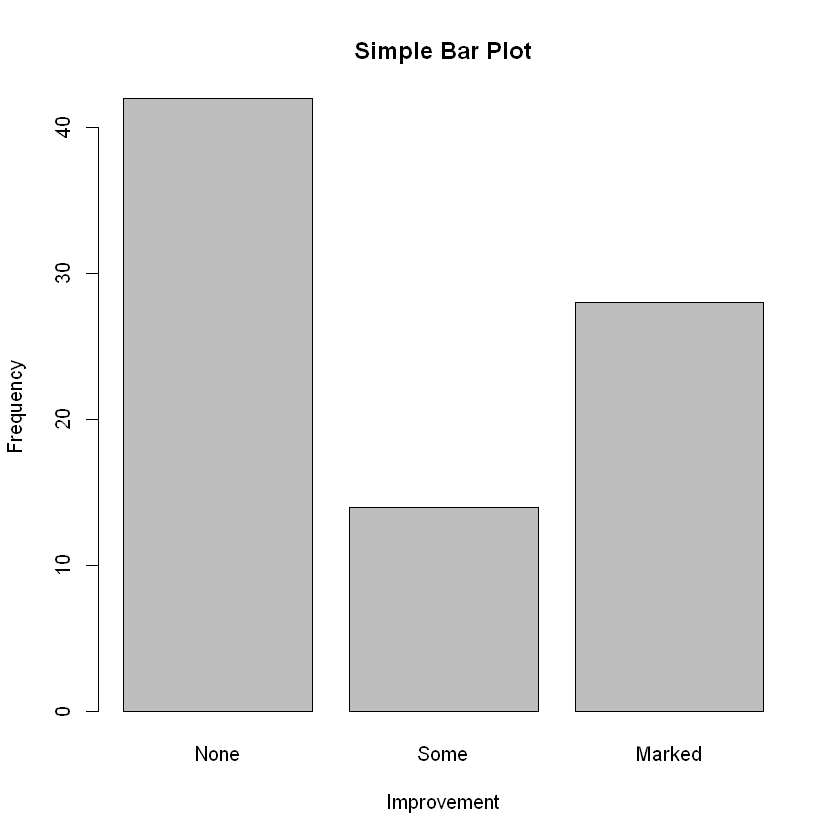

In [9]:
barplot(counts, main='Simple Bar Plot', xlab='Improvement', ylab='Frequency')

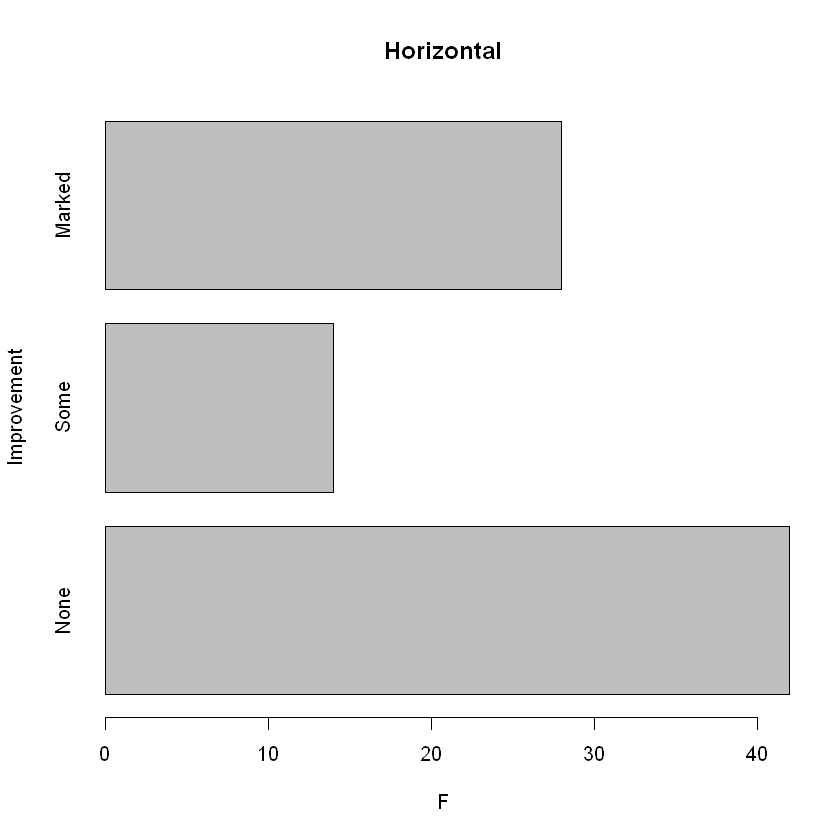

In [11]:
barplot(counts, main='Horizontal', xlab='F', ylab='Improvement', horiz=TRUE)

[1] "integer"

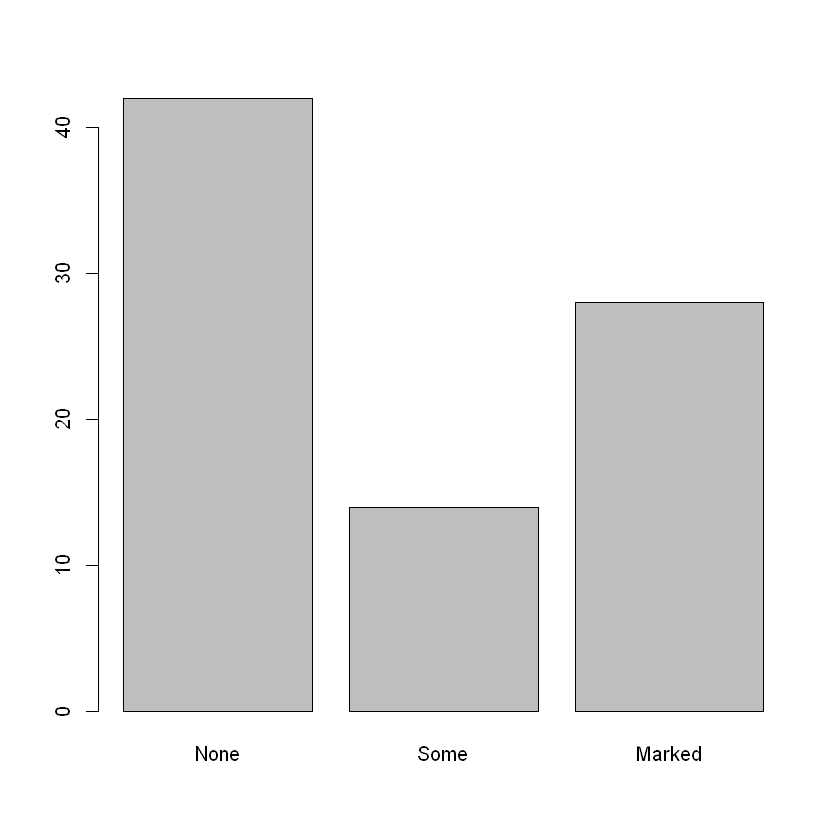

In [16]:
# plot可以直接对factor或有序factor进行barplot
plot(Arthritis$Improved)
typeof(Arthritis$Improved)

        
         Placebo Treated
  None        29      13
  Some         7       7
  Marked       7      21

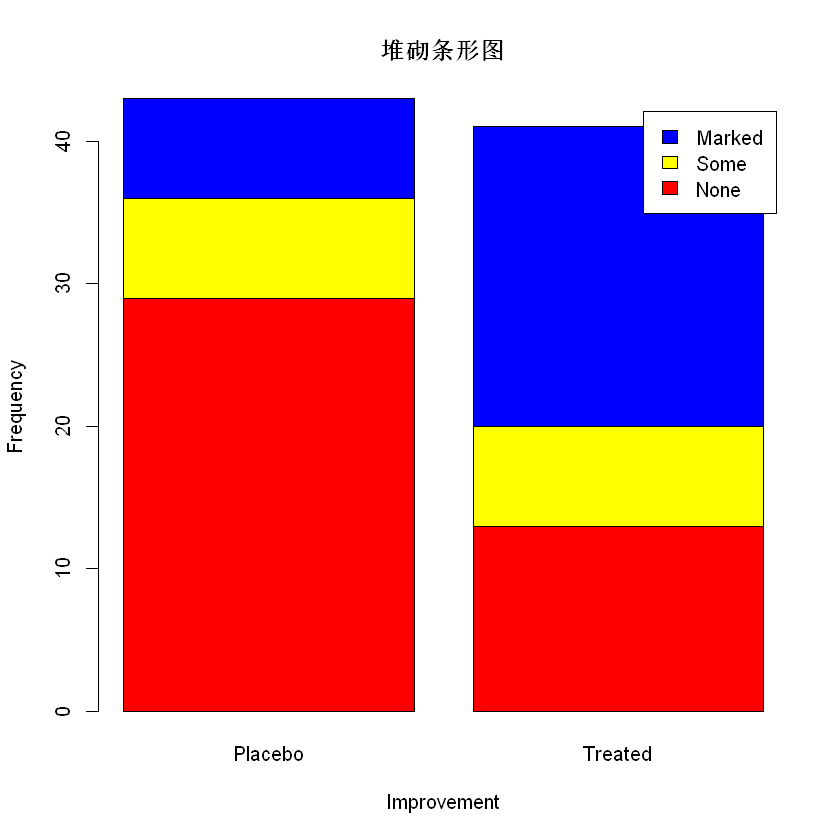

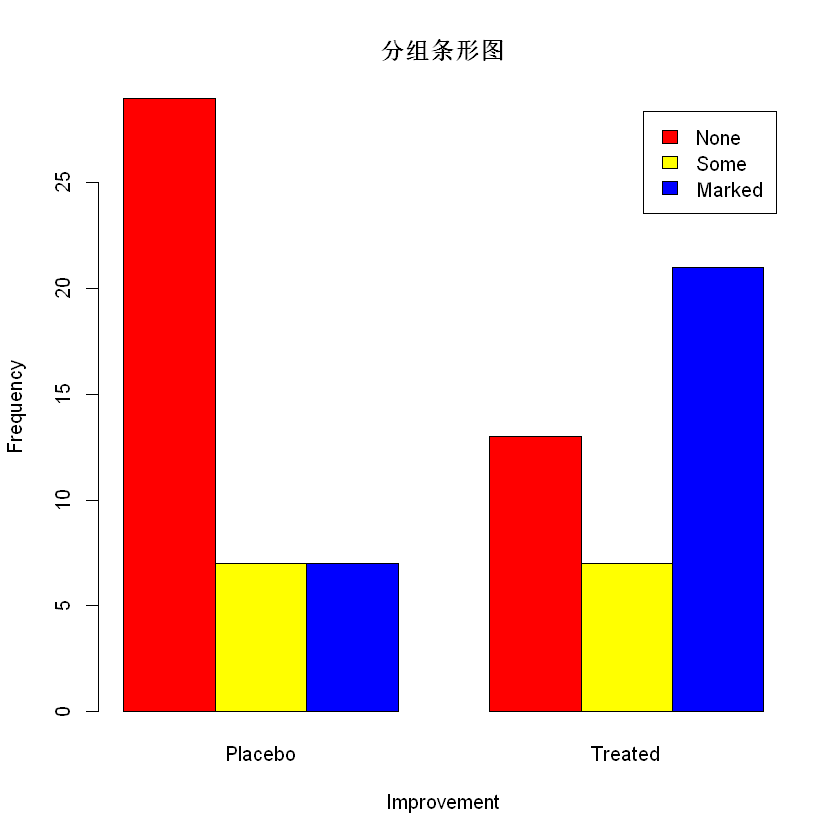

In [26]:
# 堆砌条形图
counts <- table(Arthritis$Improved, Arthritis$Treatment)
counts
barplot(counts, main='堆砌条形图', xlab='Improvement', ylab='Frequency',
       col=c('red','yellow', 'blue'),
       legend=rownames(counts))

# 分组条形图
barplot(counts,main='分组条形图', xlab='Improvement', ylab='Frequency',
       col=c('red','yellow', 'blue'),
       legend=rownames(counts),
       beside=TRUE)

Group.1,x
Northeast,1.000000
South,1.737500
North Central,0.700000
West,1.023077


,Group.1,x
3,North Central,0.700000
1,Northeast,1.000000
4,West,1.023077
2,South,1.737500


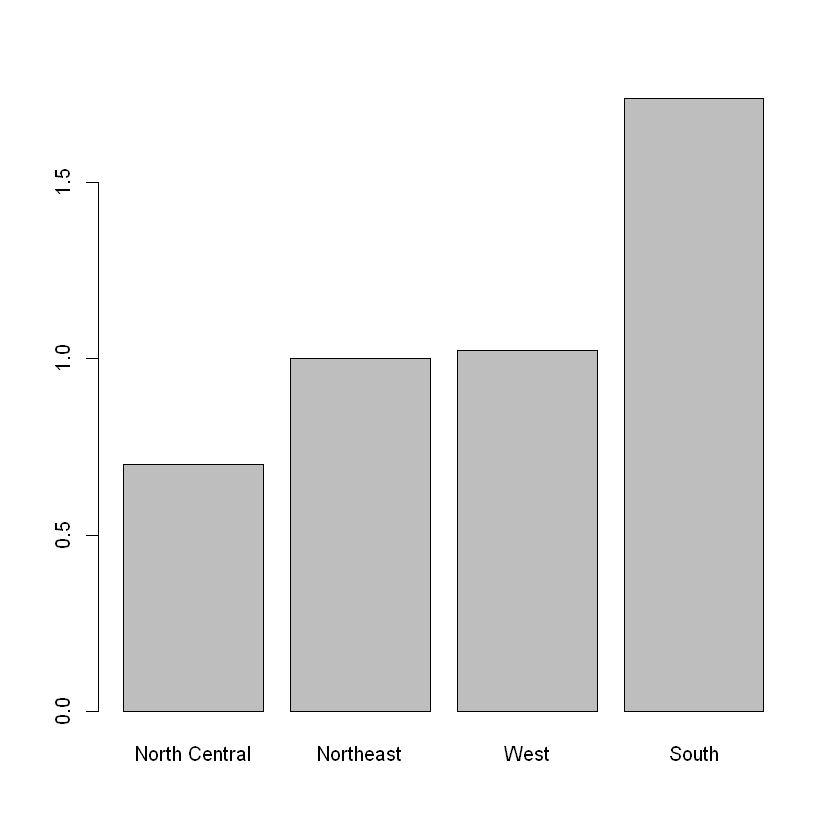

In [39]:
# 均值条形图
states <- data.frame(state.region, state.x77) # 美国各个州概况
means <- aggregate(states$Illiteracy, by=list(state.region), FUN=mean) # 计算每个区域的平均文盲率
means
means <- means[order(means$x),] # 按x从小到大排序
means
barplot(means$x, names.arg = means$Group.1)

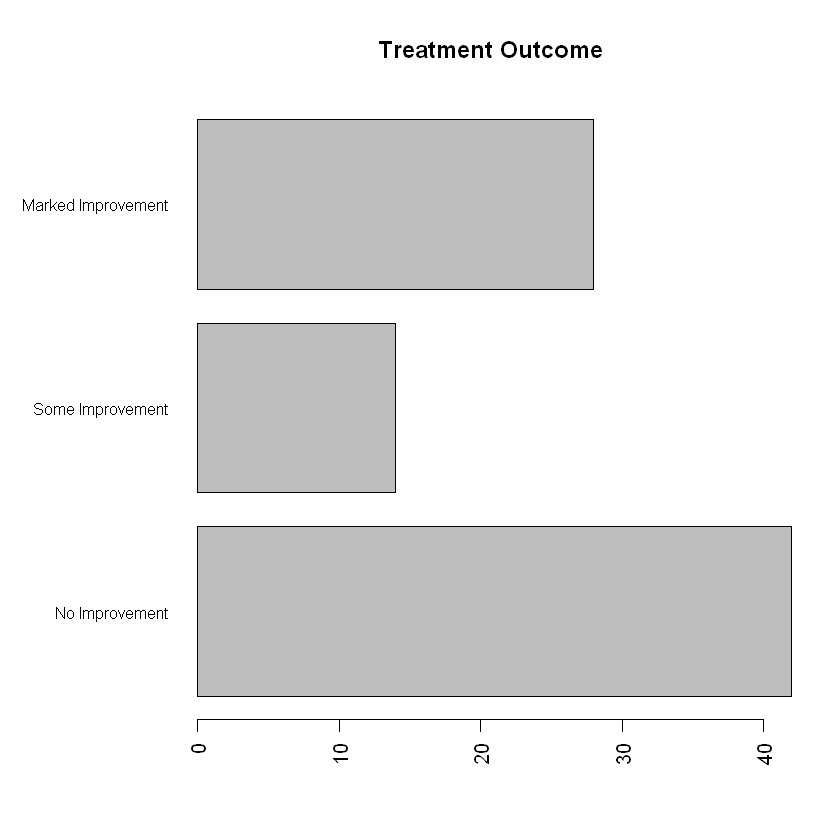

In [41]:
opar <- par(no.readonly=TRUE)
par(las=2)                # set label text perpendicular to the axis
par(mar=c(5,8,4,2))       # increase the y-axis margin
counts <- table(Arthritis$Improved) # get the data for the bars

# produce the graph
barplot(counts, 
        main="Treatment Outcome", horiz=TRUE, cex.names=0.8,
        names.arg=c("No Improvement", "Some Improvement", "Marked Improvement")
)
par(opar)


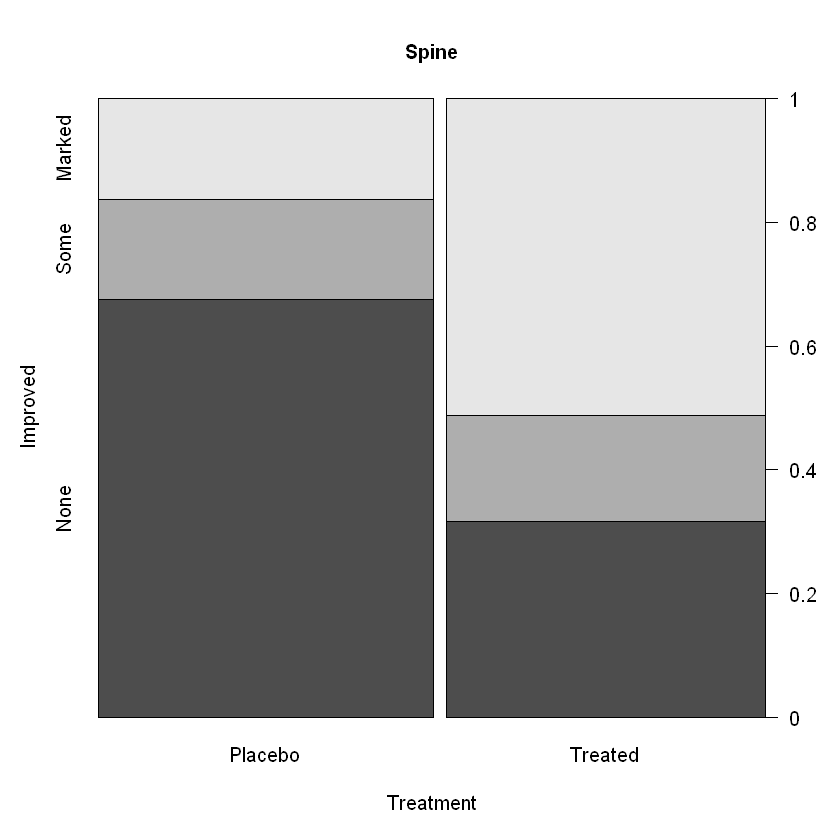

In [43]:
# 棘状图
attach(Arthritis)
counts <- table(Treatment, Improved)
spine(counts, main='Spine')
detach(Arthritis)

## 饼图

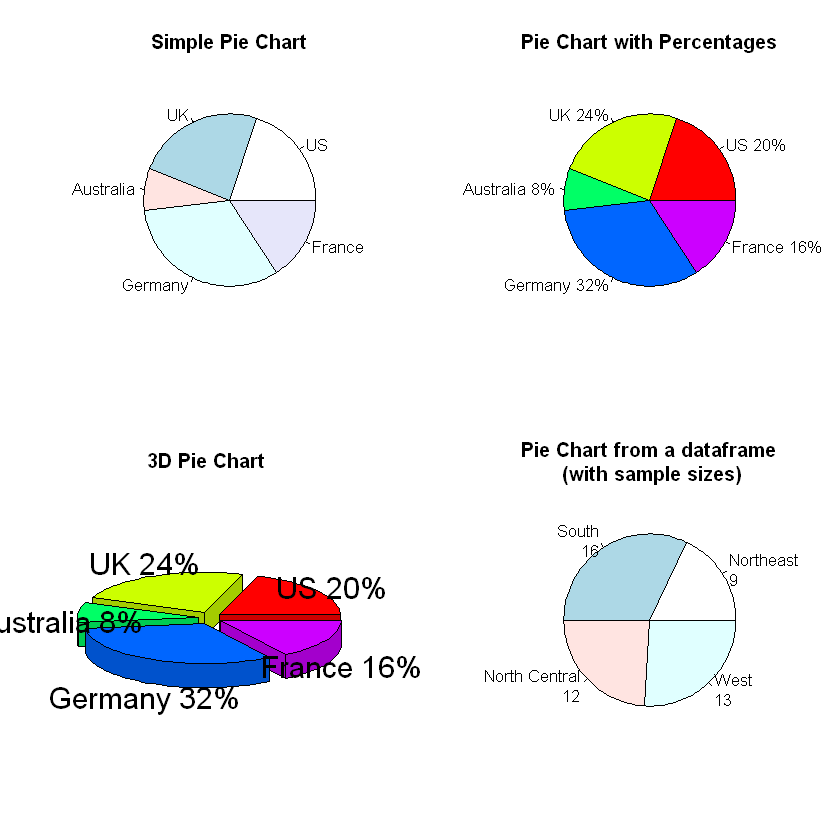

In [50]:

par(mfrow=c(2,2)) # 四幅图合一                         
slices <- c(10, 12,4, 16, 8) 
lbls <- c("US", "UK", "Australia", "Germany", "France")

pie(slices, labels = lbls, 
    main="Simple Pie Chart")

pct <- round(slices/sum(slices)*100)                      
lbls <- paste(lbls, pct) # 加数字
lbls <- paste(lbls,"%",sep="") # 加百分号
pie(slices,labels = lbls, col=rainbow(length(lbls)),
    main="Pie Chart with Percentages")

library(plotrix)
# 3D饼图
pie3D(slices, labels=lbls,explode=0.1, # 炸开程度
      main="3D Pie Chart ")

mytable <- table(state.region) # 美国不同地区的州数                               
lbls <- paste(names(mytable), "\n", mytable, sep="")
pie(mytable, labels = lbls, 
    main="Pie Chart from a dataframe\n (with sample sizes)")

par(opar)

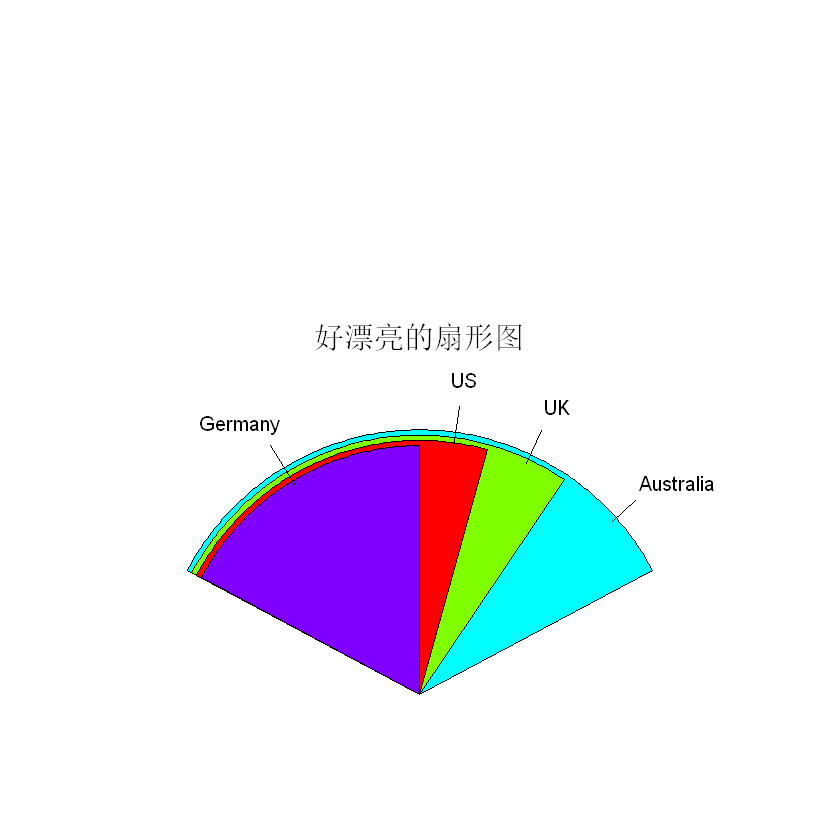

In [52]:
# 扇形图
library(plotrix)
slices <- c(10, 12.4, 16, 8)
lbls <- c("US", "UK", "Australia", "Germany", "France")
fan.plot(slices, labels=lbls, main='好漂亮的扇形图') 

## 直方图